In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nltk
import string

In [33]:
from time import time
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 

In [36]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [3]:
#https://medium.com/@dennisndungu68/text-classification-using-k-means-33bea24e4a94
#http://brandonrose.org/clustering

In [4]:
#creating instances of stemmers and lemmatizers
stemmer_ps = PorterStemmer()
stemmer_ss = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

# Load data

In [5]:
f = open("/Users/brandon/Documents/UCL/COMP0087/CW2/bds_1.txt", "r")
f_lines = f.readlines()
f.close()

In [6]:
company_ids = f_lines[0::2]
company_descriptions = f_lines[1::2]

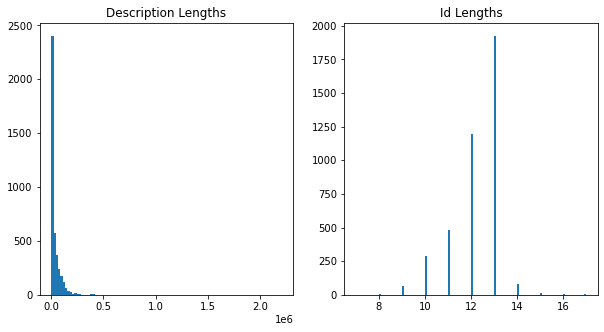

In [7]:
len_descriptions = [len(x) for x in company_descriptions]
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.hist(len_descriptions, bins=100);
plt.title('Description Lengths');

plt.subplot(1, 2, 2)
plt.hist([len(x) for x in company_ids], bins=100);
plt.title('Id Lengths');

In [8]:
valid_descriptions = np.array(len_descriptions) > 3000
n_samples = np.sum(valid_descriptions)
n_samples

2009

In [9]:
company_ids = np.array(company_ids)[valid_descriptions]
company_descriptions = [x for x in company_descriptions if len(x) > 3000]

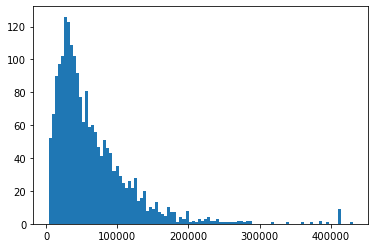

In [10]:
some_lengths = [len(x) for x in company_descriptions if len(x) < 5e5]
plt.hist(some_lengths, bins=100);

In [11]:
print(company_ids[0])
print(len(company_ids),len(company_descriptions))
company_descriptions[0]

MFIN:1000209

2009 2009


'We, Medallion Financial Corp. or the Company, are a finance company, organized as a Delaware corporation that includes Medallion Bank, our primary operating subsidiary. In recent years, our strategic growth has been through Medallion Bank, which originates consumer loans for the purchase of recreational vehicles, boats, and trailers and to finance small-scale home improvements. We historically have had a leading position in originating, acquiring, and servicing loans that finance taxi medallions and various types of commercial businesses. Since Medallion Bank acquired a consumer loan portfolio and began originating consumer loans in 2004, it has increased its consumer loan portfolio at a compound annual growth rate of 16% (19% if there had been no loan sales during 2016, 2017, and 2018). In January 2017, we announced our plans to transform our overall strategy. We have transitioned away from medallion lending and have placed our strategic focus on our growing consumer finance portfoli

# Text Pre-processing

## Stemming

In [12]:
# Takes out stop words and also stems each word using snowball stemmer
t0 = time()
stemmed_text = []
for i in range(len(company_descriptions)): #CHANGE THIS
    print(i)
    stemmed_array = company_descriptions[i].split()
    stemmed = [stemmer_ss.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed = ' '.join(stemmed)
    stemmed_text.append(stemmed)

print(stemmed_text[0])
print("done in %fs" % (time() - t0))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
we, medallion financi corp. company, financ company, organ delawar corpor includ medallion bank, primari oper subsidiary. in recent years, strateg growth medallion bank, origin consum loan purchas recreat vehicles, boats, trailer financ small-scal home improve

In [13]:
# Removing punctuation
stemmed_text2 = stemmed_text[:]
for i in range(len(stemmed_text2)):
    for k in string.punctuation:
        stemmed_text2[i] = stemmed_text2[i].replace(k, '')

## Lemmatizing

In [14]:
# Takes out stop words and also lemmatizes each word
t0 = time()
lemmad_text = []
for i in range(len(company_descriptions)): #CHANGE THIS
    print(i)
    lemmad_array = company_descriptions[i].split()
    lemmad = [lemmatizer.lemmatize(word) for word in lemmad_array if not word in set(stopwords.words('english'))]
    lemmad = ' '.join(lemmad)
    lemmad_text.append(lemmad)

print(lemmad_text[0])
print("done in %fs" % (time() - t0))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
We, Medallion Financial Corp. Company, finance company, organized Delaware corporation includes Medallion Bank, primary operating subsidiary. In recent years, strategic growth Medallion Bank, originates consumer loan purchase recreational vehicles, boats, trai

In [15]:
print(stemmed_text[0])

we, medallion financi corp. company, financ company, organ delawar corpor includ medallion bank, primari oper subsidiary. in recent years, strateg growth medallion bank, origin consum loan purchas recreat vehicles, boats, trailer financ small-scal home improvements. we histor lead posit originating, acquiring, servic loan financ taxi medallion various type commerci businesses. sinc medallion bank acquir consum loan portfolio began origin consum loan 2004, increas consum loan portfolio compound annual growth rate 16% (19% loan sale 2016, 2017, 2018). in januari 2017, announc plan transform overal strategy. we transit away medallion lend place strateg focus grow consum financ portfolio. total asset management, includ asset servic third parti investors, $1,660,000,000 decemb 31, 2019 $1,522,000,000 decemb 31, 2018, grown compound annual growth rate 9% $215,000,000 end 1996. sinc initi public offer 1996, paid distribut excess $263,060,000, $14.66 per share. we conduct busi various wholly-o

In [16]:
print(stemmed_text2[0])

we medallion financi corp company financ company organ delawar corpor includ medallion bank primari oper subsidiary in recent years strateg growth medallion bank origin consum loan purchas recreat vehicles boats trailer financ smallscal home improvements we histor lead posit originating acquiring servic loan financ taxi medallion various type commerci businesses sinc medallion bank acquir consum loan portfolio began origin consum loan 2004 increas consum loan portfolio compound annual growth rate 16 19 loan sale 2016 2017 2018 in januari 2017 announc plan transform overal strategy we transit away medallion lend place strateg focus grow consum financ portfolio total asset management includ asset servic third parti investors 1660000000 decemb 31 2019 1522000000 decemb 31 2018 grown compound annual growth rate 9 215000000 end 1996 sinc initi public offer 1996 paid distribut excess 263060000 1466 per share we conduct busi various whollyown subsidiaries including • medallion bank bank feder

In [17]:
print(lemmad_text[0])

We, Medallion Financial Corp. Company, finance company, organized Delaware corporation includes Medallion Bank, primary operating subsidiary. In recent years, strategic growth Medallion Bank, originates consumer loan purchase recreational vehicles, boats, trailer finance small-scale home improvements. We historically leading position originating, acquiring, servicing loan finance taxi medallion various type commercial businesses. Since Medallion Bank acquired consumer loan portfolio began originating consumer loan 2004, increased consumer loan portfolio compound annual growth rate 16% (19% loan sale 2016, 2017, 2018). In January 2017, announced plan transform overall strategy. We transitioned away medallion lending placed strategic focus growing consumer finance portfolio. Total asset management, includes asset serviced third party investors, $1,660,000,000 December 31, 2019 $1,522,000,000 December 31, 2018, grown compound annual growth rate 9% $215,000,000 end 1996. Since initial publ

# Feature Extraction

In [18]:
# Raw count
cv_raw = CountVectorizer(stop_words='english')
X_raw = cv_raw.fit_transform(company_descriptions)

cv_stem = CountVectorizer()
X_stemmed = cv_stem.fit_transform(stemmed_text)

cv_stem2 = CountVectorizer()
X_stemmed2 = cv_stem2.fit_transform(stemmed_text2)

cv_lem = CountVectorizer()
X_lemmad = cv_lem.fit_transform(lemmad_text)

# Tfidf 
# vec = TfidfVectorizer()
# X = vec.fit_transform(lemmad_text)
# X.shape

In [19]:
print(X_raw.shape)
print(X_stemmed.shape)
print(X_stemmed2.shape)
print(X_lemmad.shape)

(2009, 104215)
(2009, 105366)
(2009, 194170)
(2009, 103948)


## K-Means Raw text

Initialization complete
Iteration 0, inertia 2987244943.0
Iteration 1, inertia 2866893897.402684
Converged at iteration 1: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 3073196390.0
Iteration 1, inertia 2866893897.402684
Converged at iteration 1: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 3139290733.0
Iteration 1, inertia 2866893897.402684
Converged at iteration 1: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 2909909662.0
Iteration 1, inertia 2866893897.402684
Converged at iteration 1: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 2932516382.0
Iteration 1, inertia 2866893897.402684
Converged at iteration 1: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 3889087428.0
Iteration 1, inertia 2866893897.402684
Converge

Initialization complete
Iteration 0, inertia 318587979.0
Iteration 1, inertia 226166178.017903
Iteration 2, inertia 226019820.4981165
Iteration 3, inertia 226009543.33456883
Converged at iteration 3: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 365985088.0
Iteration 1, inertia 256576911.79029298
Iteration 2, inertia 242599892.1177726
Iteration 3, inertia 237120239.34951502
Iteration 4, inertia 228999607.0247184
Iteration 5, inertia 225754320.230815
Iteration 6, inertia 224232496.42804995
Iteration 7, inertia 223262497.5047155
Iteration 8, inertia 221749483.68412524
Iteration 9, inertia 220708998.8590114
Iteration 10, inertia 220214226.00525048
Iteration 11, inertia 220213615.8305261
Converged at iteration 11: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 295994001.0
Iteration 1, inertia 235934150.88254923
Iteration 2, inertia 231236711.87747213
Iteration 3, inertia 226688983.1

Initialization complete
Iteration 0, inertia 287890205.0
Iteration 1, inertia 226436890.98082557
Iteration 2, inertia 223940086.78579843
Iteration 3, inertia 218605460.80635285
Iteration 4, inertia 216985121.95057547
Converged at iteration 4: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 311522303.0
Iteration 1, inertia 237243644.4759164
Iteration 2, inertia 228803699.1269126
Iteration 3, inertia 227728595.1750725
Iteration 4, inertia 226722879.4542914
Iteration 5, inertia 226087551.9736664
Iteration 6, inertia 225805548.96508372
Iteration 7, inertia 225699474.98988947
Iteration 8, inertia 225683305.4505562
Iteration 9, inertia 225677824.57474837
Iteration 10, inertia 225676657.42489645
Converged at iteration 10: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 335466382.0
Iteration 1, inertia 210106866.3097135
Iteration 2, inertia 207302569.47444457
Iteration 3, inertia 207171674

Iteration 7, inertia 178307138.47841072
Iteration 8, inertia 178227719.7009683
Iteration 9, inertia 178192163.05274713
Iteration 10, inertia 178184968.36820957
Iteration 11, inertia 178182043.49739635
Iteration 12, inertia 178181753.59032857
Converged at iteration 12: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 272540520.0
Iteration 1, inertia 191399519.84898302
Iteration 2, inertia 190157845.70172173
Iteration 3, inertia 189821093.66019905
Iteration 4, inertia 188600801.57829955
Iteration 5, inertia 186781454.866618
Iteration 6, inertia 175613376.80907616
Iteration 7, inertia 171355113.55645266
Iteration 8, inertia 170389078.92449588
Iteration 9, inertia 170223756.99382052
Iteration 10, inertia 170206183.53455865
Iteration 11, inertia 170205992.3373067
Iteration 12, inertia 170205615.62497598
Iteration 13, inertia 170205354.88096666
Iteration 14, inertia 170205198.10917422
Converged at iteration 14: center shift 0.0 within toler

Initialization complete
Iteration 0, inertia 223375165.0
Iteration 1, inertia 176998776.8797432
Iteration 2, inertia 168717917.43106627
Iteration 3, inertia 166178231.54688466
Iteration 4, inertia 165412552.05650347
Iteration 5, inertia 165028406.30517676
Iteration 6, inertia 164804139.42785573
Iteration 7, inertia 164661737.11701077
Iteration 8, inertia 164587832.98956394
Iteration 9, inertia 164561071.38019496
Iteration 10, inertia 164537533.42761603
Iteration 11, inertia 164536973.5366398
Iteration 12, inertia 164536145.33707508
Iteration 13, inertia 164370855.5667163
Iteration 14, inertia 163970748.66574976
Iteration 15, inertia 162874893.50718102
Iteration 16, inertia 161889253.02776593
Iteration 17, inertia 161635504.63273314
Iteration 18, inertia 161364811.6043088
Iteration 19, inertia 161090350.53329572
Iteration 20, inertia 161028090.9486489
Iteration 21, inertia 160935477.6347245
Converged at iteration 21: center shift 0.0 within tolerance 0.0013693089619490647
Initialization

Iteration 11, inertia 162461680.71596852
Iteration 12, inertia 162104408.88188294
Iteration 13, inertia 161985218.3679349
Iteration 14, inertia 161855714.9863047
Iteration 15, inertia 161735370.92604226
Iteration 16, inertia 161646976.6876106
Iteration 17, inertia 161589523.91805333
Iteration 18, inertia 161573024.1114547
Iteration 19, inertia 161563084.54066238
Iteration 20, inertia 161560880.39202908
Iteration 21, inertia 161558106.1206084
Converged at iteration 21: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 242184239.0
Iteration 1, inertia 183085601.57798192
Iteration 2, inertia 179595330.75842655
Iteration 3, inertia 177999018.6471465
Iteration 4, inertia 176584125.19363046
Iteration 5, inertia 175449847.87451565
Iteration 6, inertia 174417393.3621194
Iteration 7, inertia 172851919.77723417
Iteration 8, inertia 165630699.75236884
Iteration 9, inertia 161519162.7563167
Iteration 10, inertia 161426533.56149837
Iteration 11, in

Initialization complete
Iteration 0, inertia 202387077.0
Iteration 1, inertia 153507903.83149534
Iteration 2, inertia 153007502.56953892
Iteration 3, inertia 152855067.08803418
Iteration 4, inertia 152706153.69902346
Iteration 5, inertia 152574743.17965868
Iteration 6, inertia 152436924.61932015
Iteration 7, inertia 152314797.2181919
Iteration 8, inertia 152188922.56032214
Iteration 9, inertia 152039079.46210533
Iteration 10, inertia 151933257.44526032
Iteration 11, inertia 151887131.37112772
Iteration 12, inertia 151866941.67184764
Iteration 13, inertia 151854968.35540667
Iteration 14, inertia 151854236.00993666
Converged at iteration 14: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 222195152.0
Iteration 1, inertia 164739698.91925746
Iteration 2, inertia 160564331.55242112
Iteration 3, inertia 157805738.7755663
Iteration 4, inertia 156497275.2669485
Iteration 5, inertia 156107878.06854224
Iteration 6, inertia 155797021.0824605
It

Iteration 3, inertia 149990033.36736795
Iteration 4, inertia 149674299.54460615
Iteration 5, inertia 149407509.12341332
Iteration 6, inertia 149168818.5081082
Iteration 7, inertia 148877958.7911891
Iteration 8, inertia 148550369.39135087
Iteration 9, inertia 148490859.1503368
Iteration 10, inertia 148454936.4170994
Iteration 11, inertia 148431103.84116703
Iteration 12, inertia 148417658.60131928
Iteration 13, inertia 148402527.25935337
Iteration 14, inertia 148398229.1560812
Converged at iteration 14: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 205531786.0
Iteration 1, inertia 158476099.3063913
Iteration 2, inertia 156665029.00121814
Iteration 3, inertia 156001770.93342957
Iteration 4, inertia 154998623.44250554
Iteration 5, inertia 154178620.8034211
Iteration 6, inertia 153554384.42640355
Iteration 7, inertia 151603129.3040399
Iteration 8, inertia 151057345.629566
Iteration 9, inertia 151009005.97031045
Iteration 10, inertia 150

Initialization complete
Iteration 0, inertia 201329414.0
Iteration 1, inertia 155167725.39300758
Iteration 2, inertia 153323673.18341792
Iteration 3, inertia 152714094.74266592
Iteration 4, inertia 151689511.20336097
Iteration 5, inertia 150884820.83788306
Iteration 6, inertia 150392634.68973607
Iteration 7, inertia 148838695.39551023
Iteration 8, inertia 147771471.08355266
Iteration 9, inertia 147698358.3059189
Iteration 10, inertia 147661076.86124754
Iteration 11, inertia 147649996.79527205
Iteration 12, inertia 147645923.18877232
Iteration 13, inertia 147639839.10809326
Iteration 14, inertia 147636129.02903506
Converged at iteration 14: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 198296207.0
Iteration 1, inertia 147535301.3577639
Iteration 2, inertia 144685585.88173983
Iteration 3, inertia 144184024.60582906
Iteration 4, inertia 144012399.30307585
Iteration 5, inertia 143957001.52059153
Iteration 6, inertia 143902892.38227454


Iteration 9, inertia 142025847.77892223
Iteration 10, inertia 142002157.29603937
Iteration 11, inertia 141985417.5097995
Iteration 12, inertia 141967239.5148949
Iteration 13, inertia 141954801.90864122
Iteration 14, inertia 141952025.00548905
Iteration 15, inertia 141951598.27196065
Iteration 16, inertia 141951357.41914663
Converged at iteration 16: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 237789770.0
Iteration 1, inertia 147535530.37882596
Iteration 2, inertia 144039172.59423926
Iteration 3, inertia 142608448.21945566
Iteration 4, inertia 142491857.31779903
Iteration 5, inertia 142412481.62527627
Iteration 6, inertia 142369618.23166734
Iteration 7, inertia 142355910.24636084
Iteration 8, inertia 142334485.5994331
Iteration 9, inertia 142257535.88737482
Iteration 10, inertia 142097128.5147113
Iteration 11, inertia 141415536.14705953
Iteration 12, inertia 140785772.2255215
Iteration 13, inertia 140316203.81502938
Iteration 14, 

Iteration 1, inertia 145110846.2694606
Iteration 2, inertia 141335645.2517583
Iteration 3, inertia 139857380.78678977
Iteration 4, inertia 139741632.5506742
Iteration 5, inertia 139668870.43265668
Iteration 6, inertia 139638689.05533186
Iteration 7, inertia 139624359.66422996
Iteration 8, inertia 139598316.15988335
Iteration 9, inertia 139518488.00588745
Iteration 10, inertia 139353935.3578371
Iteration 11, inertia 138674492.80900973
Iteration 12, inertia 138013685.91446266
Iteration 13, inertia 137573857.16105476
Iteration 14, inertia 137225777.45393145
Iteration 15, inertia 137131182.74894834
Iteration 16, inertia 137102875.1867948
Iteration 17, inertia 137065651.87578744
Iteration 18, inertia 137059699.25637156
Iteration 19, inertia 137049604.27708808
Iteration 20, inertia 137049120.94805503
Converged at iteration 20: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 186730501.0
Iteration 1, inertia 143751768.9923169
Iteration 2, in

Iteration 31, inertia 136601191.43125057
Iteration 32, inertia 136598055.6546476
Iteration 33, inertia 136593799.78426692
Iteration 34, inertia 136589967.33009425
Iteration 35, inertia 136587988.10980523
Iteration 36, inertia 136587009.0313968
Converged at iteration 36: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 224971618.0
Iteration 1, inertia 143787104.6477028
Iteration 2, inertia 139956828.94297075
Iteration 3, inertia 138392448.62293413
Iteration 4, inertia 138084469.0943603
Iteration 5, inertia 137884296.9246949
Iteration 6, inertia 137617007.7359962
Iteration 7, inertia 137394369.035214
Iteration 8, inertia 137167104.13088483
Iteration 9, inertia 137009023.47291678
Iteration 10, inertia 136853448.30214176
Iteration 11, inertia 136822206.63105685
Iteration 12, inertia 136795061.7838927
Iteration 13, inertia 136791809.82431728
Iteration 14, inertia 136790701.51232308
Iteration 15, inertia 136787240.84651065
Iteration 16, ine

Iteration 27, inertia 134274063.53108263
Iteration 28, inertia 134266740.27305526
Iteration 29, inertia 134252138.51914194
Iteration 30, inertia 134246071.0198828
Iteration 31, inertia 134239840.80401945
Iteration 32, inertia 134236512.8489396
Iteration 33, inertia 134233423.7991823
Iteration 34, inertia 134229782.15460202
Iteration 35, inertia 134228801.21313688
Converged at iteration 35: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 198566464.0
Iteration 1, inertia 138552829.28897324
Iteration 2, inertia 136170964.3644131
Iteration 3, inertia 135299777.36898816
Iteration 4, inertia 135043549.63237125
Iteration 5, inertia 134851217.68151158
Iteration 6, inertia 134588676.7836008
Iteration 7, inertia 134380987.2361507
Iteration 8, inertia 134249244.93471417
Iteration 9, inertia 134069373.48825426
Iteration 10, inertia 133906982.97910896
Iteration 11, inertia 133853027.95214191
Iteration 12, inertia 133827627.15198132
Iteration 13, 

Iteration 11, inertia 132777916.88136694
Iteration 12, inertia 132764103.89344007
Iteration 13, inertia 132751720.67593278
Iteration 14, inertia 132738958.68499292
Iteration 15, inertia 132719584.36619985
Iteration 16, inertia 132700859.45082758
Iteration 17, inertia 132652239.29776153
Iteration 18, inertia 132612243.98839691
Iteration 19, inertia 132552226.7742071
Iteration 20, inertia 132488257.07897389
Iteration 21, inertia 132466141.44522154
Iteration 22, inertia 132452367.30434936
Iteration 23, inertia 132434223.7918892
Iteration 24, inertia 132427669.97989571
Iteration 25, inertia 132425876.74700247
Iteration 26, inertia 132424840.07856834
Iteration 27, inertia 132424165.92177597
Iteration 28, inertia 132422032.34731713
Iteration 29, inertia 132416176.49805064
Iteration 30, inertia 132399031.85202153
Iteration 31, inertia 132387059.68088119
Iteration 32, inertia 132369461.46551408
Iteration 33, inertia 132347040.02976993
Iteration 34, inertia 132336456.49920866
Iteration 35, iner

Iteration 15, inertia 131960111.25138752
Iteration 16, inertia 131958418.4860627
Iteration 17, inertia 131957786.25877912
Iteration 18, inertia 131956784.63773113
Converged at iteration 18: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 179824412.0
Iteration 1, inertia 135815431.33228043
Iteration 2, inertia 134770777.54779163
Iteration 3, inertia 134051620.70936467
Iteration 4, inertia 133530325.47866811
Iteration 5, inertia 133449008.37173352
Iteration 6, inertia 133441778.22520867
Iteration 7, inertia 133438456.65118818
Iteration 8, inertia 133438117.28449388
Converged at iteration 8: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 182369415.0
Iteration 1, inertia 135356356.1680159
Iteration 2, inertia 132954444.60240117
Iteration 3, inertia 131967818.96454759
Iteration 4, inertia 131591406.06616017
Iteration 5, inertia 131450131.2537954
Iteration 6, inertia 131322972.07582635


Iteration 1, inertia 137108125.60865408
Iteration 2, inertia 134136387.6790143
Iteration 3, inertia 132823237.02088901
Iteration 4, inertia 131957689.24363062
Iteration 5, inertia 131459349.16418712
Iteration 6, inertia 131119300.00611736
Iteration 7, inertia 130766262.93568066
Iteration 8, inertia 130558220.18789107
Iteration 9, inertia 130297202.10887426
Iteration 10, inertia 130142961.93314703
Iteration 11, inertia 130046683.67377184
Iteration 12, inertia 129959604.85963093
Iteration 13, inertia 129850514.50179167
Iteration 14, inertia 129798804.87907594
Converged at iteration 14: center shift 0.0 within tolerance 0.0013693089619490647
Initialization complete
Iteration 0, inertia 177528043.0
Iteration 1, inertia 134309529.3322802
Iteration 2, inertia 133264875.54779147
Iteration 3, inertia 132545718.70936452
Iteration 4, inertia 132024423.47866794
Iteration 5, inertia 131943106.37173337
Iteration 6, inertia 131935876.22520852
Iteration 7, inertia 131932554.65118802
Iteration 8, iner

<function matplotlib.pyplot.show(*args, **kw)>

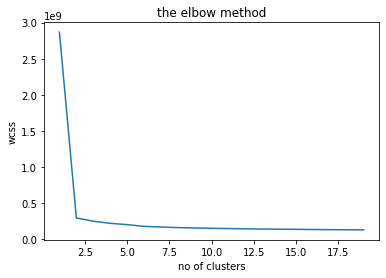

In [20]:
wcss_raw = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_raw = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_raw.fit(X_raw) #CHANGE
    wcss_raw.append(kmeans_raw.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_raw[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [21]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 10
model_raw = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_raw.fit(X_raw) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_raw = model_raw.cluster_centers_.argsort()[:, ::-1] #sort cluster centers by proximity to centroid
terms_raw = cv_raw.get_feature_names() #CHANGE
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_raw[i, :10]: #selects top terms
        print(' %s' % terms_raw[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 company
 products
 business
 services
 including
 customers
 market
 new
 product
 management
cluster 1:
 0pt
 style
 font
 margin
 times
 td
 size
 align
 span
 height
cluster 2:
 2016
 2015
 31
 december
 2014
 generation
 expense
 year
 ended
 net
cluster 3:
 credit
 shall
 lender
 agent
 loan
 section
 agreement
 administrative
 party
 rate
cluster 4:
 bank
 loans
 capital
 company
 federal
 financial
 loan
 act
 risk
 banking
cluster 5:
 product
 clinical
 fda
 products
 patients
 drug
 approval
 patent
 trial
 including
cluster 6:
 business
 combination
 initial
 shares
 public
 target
 trust
 company
 account
 stockholders
cluster 7:
 company
 business
 investment
 financial
 including
 services
 million
 capital
 market
 operations
cluster 8:
 million
 company
 31
 december
 net
 financial
 income
 2017
 operations
 cash
cluster 9:
 product
 clinical
 fda
 drug
 patients
 products
 approval
 development
 patent
 trial




## Stemmed

Initialization complete
Iteration 0, inertia 3069877260.0
Iteration 1, inertia 2925633735.530094
Converged at iteration 1: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 3179560460.0
Iteration 1, inertia 2925633735.530094
Converged at iteration 1: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 3210814013.0
Iteration 1, inertia 2925633735.530094
Converged at iteration 1: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 2998021740.0
Iteration 1, inertia 2925633735.530094
Converged at iteration 1: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 3017219661.0
Iteration 1, inertia 2925633735.530094
Converged at iteration 1: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 4138003658.0
Iteration 1, inertia 2925633735.530094
Converged at 

Iteration 12, inertia 318569317.79763675
Iteration 13, inertia 318487573.9251516
Iteration 14, inertia 318449645.61793154
Converged at iteration 14: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 424490407.0
Iteration 1, inertia 325457293.13790923
Iteration 2, inertia 322623950.1674893
Iteration 3, inertia 321793439.4384815
Iteration 4, inertia 320921459.36142606
Iteration 5, inertia 320411966.50437486
Iteration 6, inertia 320134713.00479126
Iteration 7, inertia 319961092.8999621
Iteration 8, inertia 319850842.7591947
Iteration 9, inertia 319801726.41259706
Iteration 10, inertia 319795826.5525275
Iteration 11, inertia 319792670.6799412
Iteration 12, inertia 319791786.65849596
Iteration 13, inertia 319790782.12198895
Iteration 14, inertia 319787404.87647915
Iteration 15, inertia 319786206.34685767
Iteration 16, inertia 319782080.36129576
Iteration 17, inertia 319778803.2841104
Iteration 18, inertia 319777353.41057086
Converged at iter

Iteration 8, inertia 259457703.83471966
Iteration 9, inertia 259246649.86894614
Iteration 10, inertia 259168122.99627647
Iteration 11, inertia 259095343.21030784
Iteration 12, inertia 259075887.4601382
Iteration 13, inertia 259065071.78076306
Converged at iteration 13: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 358480347.0
Iteration 1, inertia 256824842.70698103
Iteration 2, inertia 251302299.09349152
Iteration 3, inertia 248944354.35856444
Iteration 4, inertia 245612506.79427493
Iteration 5, inertia 244347252.96460614
Iteration 6, inertia 243760861.2700148
Iteration 7, inertia 243758635.5827398
Converged at iteration 7: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 320510288.0
Iteration 1, inertia 249004929.07251847
Iteration 2, inertia 246981492.7081604
Iteration 3, inertia 246350084.59662375
Iteration 4, inertia 245996495.62339902
Iteration 5, inertia 245682975.42362577
Ite

Initialization complete
Iteration 0, inertia 352572329.0
Iteration 1, inertia 254165098.23450452
Iteration 2, inertia 246662257.45238486
Iteration 3, inertia 229441161.6555477
Iteration 4, inertia 221312294.71316132
Iteration 5, inertia 217053408.16082737
Iteration 6, inertia 216051839.220329
Iteration 7, inertia 215975752.2132544
Iteration 8, inertia 215965413.1025955
Iteration 9, inertia 215964361.34215683
Converged at iteration 9: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 336517755.0
Iteration 1, inertia 225919972.93388078
Iteration 2, inertia 219573013.815518
Iteration 3, inertia 217809374.95023513
Iteration 4, inertia 216895875.4446132
Iteration 5, inertia 216466939.9698789
Iteration 6, inertia 216246186.59805226
Iteration 7, inertia 216125592.14382008
Iteration 8, inertia 216089697.83233082
Iteration 9, inertia 216080543.79935497
Iteration 10, inertia 216077005.96243832
Iteration 11, inertia 216075954.4938746
Converged at 

Iteration 19, inertia 198527659.10392296
Iteration 20, inertia 198484965.3007949
Iteration 21, inertia 198419533.26949015
Iteration 22, inertia 198285975.89405167
Iteration 23, inertia 197888664.06506646
Iteration 24, inertia 197433875.21516722
Iteration 25, inertia 196787219.06346896
Iteration 26, inertia 195763048.4478148
Iteration 27, inertia 195353260.72935018
Iteration 28, inertia 195161043.79260185
Iteration 29, inertia 195065958.30533847
Iteration 30, inertia 195033779.2328425
Iteration 31, inertia 195004809.29475683
Iteration 32, inertia 195000750.72944793
Converged at iteration 32: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 254635598.0
Iteration 1, inertia 200931157.11251274
Iteration 2, inertia 197145383.91343373
Iteration 3, inertia 196148275.71666098
Iteration 4, inertia 195562908.59934065
Iteration 5, inertia 195387811.9073335
Iteration 6, inertia 195223794.5390809
Iteration 7, inertia 195112787.56460565
Iteration 8,

Iteration 12, inertia 198526993.18599164
Iteration 13, inertia 198524631.49360806
Iteration 14, inertia 198523538.74170396
Iteration 15, inertia 198523152.56911173
Iteration 16, inertia 198522248.29645795
Iteration 17, inertia 198521222.08439973
Converged at iteration 17: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 291786846.0
Iteration 1, inertia 195198232.45722365
Iteration 2, inertia 193745133.67857635
Iteration 3, inertia 193516419.38381675
Iteration 4, inertia 193447910.68385598
Iteration 5, inertia 193426749.5435634
Iteration 6, inertia 193408121.2600017
Converged at iteration 6: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 251541553.0
Iteration 1, inertia 191931628.90847734
Iteration 2, inertia 191167750.89476818
Iteration 3, inertia 191128290.16272706
Iteration 4, inertia 191127014.84044048
Iteration 5, inertia 191126757.24076015
Converged at iteration 5: center shift 

Iteration 17, inertia 181990040.68688807
Iteration 18, inertia 181988228.15588215
Iteration 19, inertia 181985044.7603421
Iteration 20, inertia 181982284.5636321
Iteration 21, inertia 181978969.77334592
Iteration 22, inertia 181973241.68212634
Iteration 23, inertia 181971655.56033254
Iteration 24, inertia 181970981.06604013
Iteration 25, inertia 181970329.85284817
Iteration 26, inertia 181970074.24575505
Converged at iteration 26: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 265041088.0
Iteration 1, inertia 195105016.844321
Iteration 2, inertia 189170398.49648088
Iteration 3, inertia 185753097.33329448
Iteration 4, inertia 184957251.77801827
Iteration 5, inertia 184769045.49695444
Iteration 6, inertia 184590167.20922098
Iteration 7, inertia 184282946.94845793
Iteration 8, inertia 183213147.31267166
Iteration 9, inertia 182599184.0113684
Iteration 10, inertia 182399560.62121367
Iteration 11, inertia 182302117.52337226
Iteration 12, 

Iteration 4, inertia 176332348.67547017
Iteration 5, inertia 176166334.78101498
Iteration 6, inertia 176055773.97905377
Iteration 7, inertia 175953491.23048317
Iteration 8, inertia 175906023.15687236
Iteration 9, inertia 175880059.29267538
Iteration 10, inertia 175867097.90539145
Iteration 11, inertia 175855138.12501302
Iteration 12, inertia 175849217.10254365
Iteration 13, inertia 175839411.80071265
Iteration 14, inertia 175831437.57985225
Iteration 15, inertia 175825475.93349487
Iteration 16, inertia 175820750.62639606
Iteration 17, inertia 175816205.29745945
Iteration 18, inertia 175809868.45241848
Iteration 19, inertia 175806828.05420187
Iteration 20, inertia 175803883.3683775
Iteration 21, inertia 175802692.7610455
Iteration 22, inertia 175802315.40859973
Iteration 23, inertia 175801905.13662806
Iteration 24, inertia 175800241.43124714
Iteration 25, inertia 175799763.7855042
Iteration 26, inertia 175797621.99827227
Iteration 27, inertia 175796082.05472118
Iteration 28, inertia 175

Iteration 8, inertia 172911625.7753114
Iteration 9, inertia 172221116.56941643
Iteration 10, inertia 171479129.78383195
Iteration 11, inertia 170688066.74911198
Iteration 12, inertia 170238772.05559662
Iteration 13, inertia 169621136.40812615
Iteration 14, inertia 169302002.38937145
Iteration 15, inertia 169110069.27033252
Iteration 16, inertia 168916476.11026648
Iteration 17, inertia 168714241.293794
Iteration 18, inertia 168645109.33959174
Iteration 19, inertia 168598589.62091997
Iteration 20, inertia 168564913.28874296
Iteration 21, inertia 168528708.30066898
Iteration 22, inertia 168332596.3947876
Iteration 23, inertia 168125552.55560666
Iteration 24, inertia 168060511.11936772
Iteration 25, inertia 168019845.49499208
Iteration 26, inertia 167999437.6769236
Iteration 27, inertia 167979589.98512176
Iteration 28, inertia 167929210.6255751
Iteration 29, inertia 167787761.24428296
Iteration 30, inertia 167757603.54309857
Iteration 31, inertia 167756725.716382
Iteration 32, inertia 1677

Initialization complete
Iteration 0, inertia 230501104.0
Iteration 1, inertia 174979509.31079724
Iteration 2, inertia 172597366.20471287
Iteration 3, inertia 171174472.55842182
Iteration 4, inertia 168958499.39165434
Iteration 5, inertia 167915924.1239827
Iteration 6, inertia 167561393.59267443
Iteration 7, inertia 167489374.53188613
Iteration 8, inertia 167452646.0697981
Iteration 9, inertia 167417099.33295178
Iteration 10, inertia 167399216.78688434
Iteration 11, inertia 167395809.71951956
Converged at iteration 11: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 242202265.0
Iteration 1, inertia 172665503.96844488
Iteration 2, inertia 167668524.5663741
Iteration 3, inertia 166519006.96189135
Iteration 4, inertia 166241752.1839139
Iteration 5, inertia 166070763.14097792
Iteration 6, inertia 165992311.21790826
Iteration 7, inertia 165959549.12474474
Iteration 8, inertia 165917567.6304687
Iteration 9, inertia 165874577.58768556
Iterati

Iteration 3, inertia 166590000.51747283
Iteration 4, inertia 164815032.53996807
Iteration 5, inertia 163363349.54888457
Iteration 6, inertia 162586760.52980235
Iteration 7, inertia 162416949.0669267
Iteration 8, inertia 162364540.3438396
Iteration 9, inertia 162331878.32719216
Iteration 10, inertia 162322146.19302043
Iteration 11, inertia 162320749.14250877
Iteration 12, inertia 162318586.2753347
Converged at iteration 12: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 240191533.0
Iteration 1, inertia 168271330.9555131
Iteration 2, inertia 164822900.06119353
Iteration 3, inertia 163546662.2841388
Iteration 4, inertia 163073089.5721608
Iteration 5, inertia 162676851.56345728
Iteration 6, inertia 162487730.60597882
Iteration 7, inertia 162355365.81265733
Iteration 8, inertia 162263118.785093
Iteration 9, inertia 162183710.3936792
Iteration 10, inertia 162055199.27438632
Iteration 11, inertia 161783629.15583873
Iteration 12, inertia 161

Iteration 2, inertia 165405569.5988214
Iteration 3, inertia 164806720.29513302
Iteration 4, inertia 163682359.9346723
Iteration 5, inertia 161421632.59209046
Iteration 6, inertia 159616497.50968683
Iteration 7, inertia 159077526.29443204
Iteration 8, inertia 158949203.5376731
Iteration 9, inertia 158912530.972019
Iteration 10, inertia 158901332.33179435
Iteration 11, inertia 158897126.22729352
Iteration 12, inertia 158895545.52054274
Iteration 13, inertia 158890289.09395483
Converged at iteration 13: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 236370882.0
Iteration 1, inertia 166034413.26898837
Iteration 2, inertia 162231884.77363262
Iteration 3, inertia 160954227.74831942
Iteration 4, inertia 160290441.79920918
Iteration 5, inertia 159892908.92189786
Iteration 6, inertia 159450912.1814301
Iteration 7, inertia 159169307.67795455
Iteration 8, inertia 158744319.58456022
Iteration 9, inertia 158322110.22086546
Iteration 10, inertia 1

Iteration 32, inertia 160732333.95525378
Iteration 33, inertia 160727778.34984457
Iteration 34, inertia 160724742.57075107
Iteration 35, inertia 160721271.6320551
Iteration 36, inertia 160720409.11736426
Converged at iteration 36: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 231367844.0
Iteration 1, inertia 168218026.08106035
Iteration 2, inertia 164667874.5295802
Iteration 3, inertia 162215315.9963799
Iteration 4, inertia 160211376.0205152
Iteration 5, inertia 159906979.17096588
Iteration 6, inertia 159870013.95411497
Iteration 7, inertia 159835629.25010666
Iteration 8, inertia 159727820.12104288
Iteration 9, inertia 159638902.6426111
Iteration 10, inertia 159537815.80519262
Iteration 11, inertia 159485424.52953747
Iteration 12, inertia 159382202.35215613
Iteration 13, inertia 159319245.90486616
Iteration 14, inertia 159288247.17112
Iteration 15, inertia 159235138.40159872
Iteration 16, inertia 159214618.8431609
Iteration 17, iner

Iteration 28, inertia 154085891.91240263
Iteration 29, inertia 154073255.13498488
Iteration 30, inertia 154034526.4586988
Iteration 31, inertia 153992517.07708427
Iteration 32, inertia 153919422.9701975
Iteration 33, inertia 153842913.15048563
Iteration 34, inertia 153764810.00600982
Iteration 35, inertia 153729444.5408967
Iteration 36, inertia 153705478.263015
Iteration 37, inertia 153671353.21477506
Iteration 38, inertia 153640386.18819594
Iteration 39, inertia 153612544.57573345
Iteration 40, inertia 153568584.12171033
Iteration 41, inertia 153495380.06552702
Iteration 42, inertia 153447535.14184436
Iteration 43, inertia 153406579.49563676
Iteration 44, inertia 153367068.6458823
Iteration 45, inertia 153299642.89300227
Iteration 46, inertia 153255386.60229978
Iteration 47, inertia 153223142.17427266
Iteration 48, inertia 153201298.71531183
Iteration 49, inertia 153187591.0265685
Iteration 50, inertia 153176950.97177345
Iteration 51, inertia 153173494.56591362
Iteration 52, inertia 1

Initialization complete
Iteration 0, inertia 231827734.0
Iteration 1, inertia 168912321.98371786
Iteration 2, inertia 164082647.52932787
Iteration 3, inertia 161955104.90929097
Iteration 4, inertia 160688693.52504838
Iteration 5, inertia 158770670.41823715
Iteration 6, inertia 157197428.08045444
Iteration 7, inertia 156011646.13585362
Iteration 8, inertia 155161539.8796194
Iteration 9, inertia 155074259.22108632
Iteration 10, inertia 155048299.35865903
Converged at iteration 10: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 225774589.0
Iteration 1, inertia 163379938.46841928
Iteration 2, inertia 160661643.06420657
Iteration 3, inertia 158873884.98051915
Iteration 4, inertia 157792334.43343964
Iteration 5, inertia 157385338.21315295
Iteration 6, inertia 157175111.93370694
Iteration 7, inertia 157040955.50233352
Iteration 8, inertia 156974137.34546646
Iteration 9, inertia 156910109.11098433
Iteration 10, inertia 156860217.22191244
Ite

Iteration 6, inertia 152622823.0200526
Iteration 7, inertia 151877238.19660562
Iteration 8, inertia 151059634.80967876
Iteration 9, inertia 150726985.44994122
Iteration 10, inertia 150610305.92049164
Iteration 11, inertia 150520402.09801102
Iteration 12, inertia 150464630.2036775
Iteration 13, inertia 150439873.22876775
Iteration 14, inertia 150427327.75444305
Iteration 15, inertia 150423586.22149256
Iteration 16, inertia 150418087.1419162
Iteration 17, inertia 150417821.95307657
Iteration 18, inertia 150417711.65348312
Converged at iteration 18: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 206712531.0
Iteration 1, inertia 159433920.0568285
Iteration 2, inertia 157726150.03860587
Iteration 3, inertia 156581680.7589239
Iteration 4, inertia 156110217.2518441
Iteration 5, inertia 155832568.32694006
Iteration 6, inertia 155759443.22245747
Iteration 7, inertia 155666340.85344383
Iteration 8, inertia 155621874.44377816
Iteration 9, inert

Iteration 22, inertia 148705273.991961
Iteration 23, inertia 148702301.3128808
Iteration 24, inertia 148701478.5379184
Converged at iteration 24: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 226036406.0
Iteration 1, inertia 157349581.0454063
Iteration 2, inertia 154532363.4813579
Iteration 3, inertia 152948509.35616988
Iteration 4, inertia 151769808.33586463
Iteration 5, inertia 150411329.34685388
Iteration 6, inertia 149773354.50620592
Iteration 7, inertia 149356907.2195379
Iteration 8, inertia 149183043.26039153
Iteration 9, inertia 149078087.1248997
Iteration 10, inertia 149035996.71581805
Iteration 11, inertia 149011917.63070378
Iteration 12, inertia 149003571.40048805
Iteration 13, inertia 149000553.71800065
Iteration 14, inertia 148998327.166646
Iteration 15, inertia 148997957.84048167
Converged at iteration 15: center shift 0.0 within tolerance 0.001382100185258677
Initialization complete
Iteration 0, inertia 205022177.0
Ite

<function matplotlib.pyplot.show(*args, **kw)>

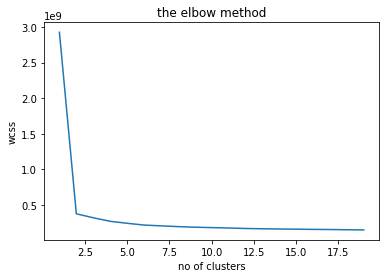

In [22]:
wcss_stemmed = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_stem = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_stem.fit(X_stemmed) #CHANGE
    wcss_stemmed.append(kmeans_stem.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_stemmed[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [23]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 10
model_stem = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_stem.fit(X_stemmed) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_stem = model_stem.cluster_centers_.argsort()[:, ::-1]
terms_stem = cv_stem.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_stem[i, :10]: #selects top terms
        print(' %s' % terms_stem[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 trust
 the
 futur
 contract
 oil
 may
 price
 market
 share
 gas
cluster 1:
 0pt
 style
 font
 margin
 td
 size
 align
 bottom
 span
 height
cluster 2:
 the
 we
 product
 compani
 includ
 market
 our
 oper
 in
 servic
cluster 3:
 lender
 credit
 shall
 loan
 agent
 section
 agreement
 rate
 administr
 parti
cluster 4:
 product
 clinic
 the
 may
 fda
 drug
 approv
 patient
 trial
 in
cluster 5:
 busi
 may
 the
 invest
 compani
 we
 includ
 oper
 requir
 manag
cluster 6:
 2016
 2015
 31
 oper
 year
 decemb
 2014
 revenu
 electr
 the
cluster 7:
 product
 may
 clinic
 the
 patient
 approv
 trial
 drug
 fda
 patent
cluster 8:
 bank
 loan
 the
 capit
 compani
 feder
 financi
 requir
 act
 risk
cluster 9:
 the
 million
 may
 compani
 oper
 result
 includ
 financi
 31
 decemb




## Stemmed and removed punctuation

Initialization complete
Iteration 0, inertia 625342192.0
Iteration 1, inertia 488941060.3554007
Converged at iteration 1: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 733112823.0
Iteration 1, inertia 488941060.3554007
Converged at iteration 1: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 769330398.0
Iteration 1, inertia 488941060.3554007
Converged at iteration 1: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 556822936.0
Iteration 1, inertia 488941060.3554007
Converged at iteration 1: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 575426416.0
Iteration 1, inertia 488941060.3554007
Converged at iteration 1: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 1571851617.0
Iteration 1, inertia 488941060.3554007
Converged at 

Iteration 17, inertia 303970371.26645577
Iteration 18, inertia 303969184.47726595
Iteration 19, inertia 303968582.4805869
Converged at iteration 19: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 489070426.0
Iteration 1, inertia 307994803.5532069
Iteration 2, inertia 304697648.7042346
Iteration 3, inertia 304050347.28221613
Iteration 4, inertia 303858952.28844684
Converged at iteration 4: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 393802480.0
Iteration 1, inertia 315760745.51134783
Iteration 2, inertia 310319046.57674235
Iteration 3, inertia 305940382.0682909
Iteration 4, inertia 305077035.5186867
Iteration 5, inertia 304710873.3135543
Iteration 6, inertia 304266007.698816
Iteration 7, inertia 303984002.93879604
Iteration 8, inertia 303858952.28844684
Converged at iteration 8: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia

Initialization complete
Iteration 0, inertia 363954046.0
Iteration 1, inertia 266565262.3851061
Iteration 2, inertia 258626352.64662275
Iteration 3, inertia 256632864.04003266
Iteration 4, inertia 256299911.91904956
Iteration 5, inertia 256210149.19817033
Iteration 6, inertia 256205737.7526345
Converged at iteration 6: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 435510820.0
Iteration 1, inertia 249003493.15546116
Iteration 2, inertia 239092102.24572882
Iteration 3, inertia 235358837.4311492
Iteration 4, inertia 233435645.21936914
Iteration 5, inertia 232464256.65642738
Iteration 6, inertia 232265437.4649203
Converged at iteration 6: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 317916826.0
Iteration 1, inertia 249163421.25542483
Iteration 2, inertia 242036100.98262042
Iteration 3, inertia 238851938.0090425
Iteration 4, inertia 235153220.81633478
Iteration 5, inertia 233265347

Iteration 10, inertia 232339279.79500198
Iteration 11, inertia 232303300.22742352
Iteration 12, inertia 232274192.2373857
Iteration 13, inertia 232260060.88462353
Iteration 14, inertia 232255299.6175988
Converged at iteration 14: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 257249088.0
Iteration 1, inertia 206207481.03624374
Iteration 2, inertia 205783575.7649143
Iteration 3, inertia 205703426.754289
Iteration 4, inertia 205694534.27321032
Iteration 5, inertia 205693497.2561026
Iteration 6, inertia 205692539.21424502
Converged at iteration 6: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 293091806.0
Iteration 1, inertia 224007968.40301856
Iteration 2, inertia 222995673.22833815
Iteration 3, inertia 222819305.06508878
Iteration 4, inertia 222764560.34196487
Iteration 5, inertia 222747507.02528208
Iteration 6, inertia 222742985.69529703
Iteration 7, inertia 222742545.8656671
Con

Iteration 18, inertia 193893593.20949078
Iteration 19, inertia 193868188.60572016
Iteration 20, inertia 193851276.60084748
Iteration 21, inertia 193848317.32807848
Iteration 22, inertia 193845692.23014542
Iteration 23, inertia 193843937.91097316
Converged at iteration 23: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 303570087.0
Iteration 1, inertia 211778176.7641035
Iteration 2, inertia 205821040.1352305
Iteration 3, inertia 201596535.99383122
Iteration 4, inertia 197525678.15722346
Iteration 5, inertia 195996659.04102662
Iteration 6, inertia 195620710.92004701
Iteration 7, inertia 195457109.29484665
Iteration 8, inertia 195384827.9482308
Iteration 9, inertia 195359575.63852695
Converged at iteration 9: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 274259268.0
Iteration 1, inertia 205824366.08247072
Iteration 2, inertia 198425850.41572657
Iteration 3, inertia 195781396.0000144

Iteration 13, inertia 185088905.5145274
Iteration 14, inertia 185036029.3724924
Iteration 15, inertia 185019026.59723693
Iteration 16, inertia 185013575.21785215
Iteration 17, inertia 185011044.98486423
Iteration 18, inertia 185007636.05309403
Iteration 19, inertia 185006836.9378418
Converged at iteration 19: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 267595273.0
Iteration 1, inertia 191283238.79555225
Iteration 2, inertia 187577547.37261242
Iteration 3, inertia 186244529.24658835
Iteration 4, inertia 185879887.68422648
Iteration 5, inertia 185836600.38031232
Iteration 6, inertia 185833601.45324716
Iteration 7, inertia 185831294.1967859
Converged at iteration 7: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 304010129.0
Iteration 1, inertia 196348595.9852531
Iteration 2, inertia 183501440.43950164
Iteration 3, inertia 182522443.52773267
Iteration 4, inertia 180857820.30653825

Iteration 12, inertia 176623432.53317392
Iteration 13, inertia 176329547.12986585
Iteration 14, inertia 176294300.94514093
Iteration 15, inertia 176289897.4719326
Iteration 16, inertia 176288272.48117515
Converged at iteration 16: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 262004963.0
Iteration 1, inertia 184719700.5323075
Iteration 2, inertia 180751765.7532556
Iteration 3, inertia 179714383.56623107
Iteration 4, inertia 179528515.26091704
Iteration 5, inertia 179459307.2116575
Iteration 6, inertia 179365152.56072757
Iteration 7, inertia 179249059.7622318
Iteration 8, inertia 179051274.44545296
Iteration 9, inertia 178635604.60255572
Iteration 10, inertia 177928256.73231474
Iteration 11, inertia 177711451.41546786
Iteration 12, inertia 177700116.80014798
Iteration 13, inertia 177697727.59870398
Iteration 14, inertia 177692880.79738316
Converged at iteration 14: center shift 0.0 within tolerance 0.0001253413715520209
Initializati

Initialization complete
Iteration 0, inertia 228543460.0
Iteration 1, inertia 174947117.50085878
Iteration 2, inertia 171258881.14948544
Iteration 3, inertia 170155290.5806483
Iteration 4, inertia 170058799.5492027
Iteration 5, inertia 170018431.95299855
Iteration 6, inertia 169975173.6765712
Iteration 7, inertia 169952736.7252767
Iteration 8, inertia 169930819.1414093
Iteration 9, inertia 169930001.6286493
Iteration 10, inertia 169928920.26200858
Iteration 11, inertia 169928320.28391042
Converged at iteration 11: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 248470292.0
Iteration 1, inertia 181604432.75709423
Iteration 2, inertia 172435759.72960448
Iteration 3, inertia 169011660.70474002
Iteration 4, inertia 167977368.7814999
Iteration 5, inertia 167520872.3426258
Iteration 6, inertia 167111752.8097699
Iteration 7, inertia 166668383.24841002
Iteration 8, inertia 166296851.35479793
Iteration 9, inertia 166056374.03475568
Iteration 

Iteration 8, inertia 161831635.72753546
Iteration 9, inertia 161605579.10812888
Iteration 10, inertia 161353410.78140336
Iteration 11, inertia 161271536.59190705
Iteration 12, inertia 161227988.8002744
Iteration 13, inertia 161196512.03124237
Iteration 14, inertia 161172784.8507674
Iteration 15, inertia 161143806.3599944
Iteration 16, inertia 161120763.44655472
Iteration 17, inertia 161078230.86768594
Iteration 18, inertia 161052397.87050074
Iteration 19, inertia 161022974.56068864
Iteration 20, inertia 160983812.78866994
Iteration 21, inertia 160983515.62369502
Iteration 22, inertia 160983304.1911239
Converged at iteration 22: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 228590538.0
Iteration 1, inertia 169395367.664658
Iteration 2, inertia 167892540.69656825
Iteration 3, inertia 167365336.96490887
Iteration 4, inertia 166820547.6937605
Iteration 5, inertia 165989326.03845358
Iteration 6, inertia 164935473.3556745
Iteration 7, in

Iteration 5, inertia 164888106.55358312
Iteration 6, inertia 163854913.0980592
Iteration 7, inertia 163607898.53351006
Iteration 8, inertia 163129902.65805724
Iteration 9, inertia 162888626.57951635
Iteration 10, inertia 162688326.6183795
Iteration 11, inertia 162360157.34555015
Iteration 12, inertia 162089698.25644615
Iteration 13, inertia 161948288.03439844
Iteration 14, inertia 161869000.9846946
Iteration 15, inertia 161809688.6108216
Iteration 16, inertia 161770912.09050602
Iteration 17, inertia 161758581.4852673
Iteration 18, inertia 161745176.76975468
Iteration 19, inertia 161730722.94706434
Iteration 20, inertia 161722989.943961
Iteration 21, inertia 161709238.84842288
Iteration 22, inertia 161694643.5444288
Iteration 23, inertia 161669134.94654274
Iteration 24, inertia 161648271.9679121
Iteration 25, inertia 161636936.96323365
Iteration 26, inertia 161619082.73506734
Iteration 27, inertia 161600071.6442795
Iteration 28, inertia 161546925.40401587
Iteration 29, inertia 161478407

Iteration 24, inertia 154291644.03496817
Iteration 25, inertia 154288245.48211595
Iteration 26, inertia 154287136.7321229
Converged at iteration 26: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 232436465.0
Iteration 1, inertia 162576766.92596886
Iteration 2, inertia 157713881.57630652
Iteration 3, inertia 156060721.5426444
Iteration 4, inertia 155522554.59662575
Iteration 5, inertia 155247727.55608097
Iteration 6, inertia 155044992.4128718
Iteration 7, inertia 154829647.5837635
Iteration 8, inertia 154422743.23817605
Iteration 9, inertia 153978586.77174762
Iteration 10, inertia 153759842.94649902
Iteration 11, inertia 153624724.2113475
Iteration 12, inertia 153570048.83799475
Iteration 13, inertia 153537726.17401513
Iteration 14, inertia 153501289.4669539
Iteration 15, inertia 153455800.24331313
Iteration 16, inertia 153276414.2922317
Iteration 17, inertia 153166945.9452181
Iteration 18, inertia 153075284.53468025
Iteration 19, in

Iteration 4, inertia 152988827.59465453
Iteration 5, inertia 152664702.7090822
Iteration 6, inertia 152583816.0241016
Iteration 7, inertia 152521386.05279988
Iteration 8, inertia 152444882.5614083
Iteration 9, inertia 152390158.3849456
Iteration 10, inertia 152352188.14916718
Iteration 11, inertia 152327775.25272542
Iteration 12, inertia 152286023.37868115
Iteration 13, inertia 152260200.03101006
Iteration 14, inertia 152239581.11460233
Iteration 15, inertia 152210860.55630162
Converged at iteration 15: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 227370136.0
Iteration 1, inertia 160872157.39675114
Iteration 2, inertia 156281491.11048192
Iteration 3, inertia 153916130.51385647
Iteration 4, inertia 153332073.4513393
Iteration 5, inertia 153195033.56069493
Iteration 6, inertia 152940262.87789458
Iteration 7, inertia 152886090.71290168
Iteration 8, inertia 152879861.47863424
Iteration 9, inertia 152876859.43812907
Iteration 10, inert

Iteration 21, inertia 154013462.1336015
Iteration 22, inertia 154011311.4209733
Iteration 23, inertia 154010944.4247325
Iteration 24, inertia 154009818.27681452
Iteration 25, inertia 154009245.03702736
Iteration 26, inertia 154007078.2809102
Iteration 27, inertia 154006397.1771505
Iteration 28, inertia 154003940.34229693
Iteration 29, inertia 154003169.00043982
Iteration 30, inertia 154003028.20315632
Converged at iteration 30: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 210059100.0
Iteration 1, inertia 153588795.18083197
Iteration 2, inertia 151599691.27552503
Iteration 3, inertia 150703057.16451642
Iteration 4, inertia 150028851.28997898
Iteration 5, inertia 149731014.36275363
Iteration 6, inertia 149512687.63063785
Iteration 7, inertia 149402647.48972666
Iteration 8, inertia 149344845.41764626
Iteration 9, inertia 149306738.46699885
Iteration 10, inertia 149293097.35631198
Iteration 11, inertia 149282278.80193156
Iteration 12,

Iteration 31, inertia 147972012.04948357
Iteration 32, inertia 147971429.11608705
Iteration 33, inertia 147971177.28902936
Converged at iteration 33: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 210146121.0
Iteration 1, inertia 159808098.1116093
Iteration 2, inertia 157951786.44667938
Iteration 3, inertia 157596032.7459625
Iteration 4, inertia 157417431.94258547
Iteration 5, inertia 157337300.1920001
Iteration 6, inertia 157285295.04725665
Iteration 7, inertia 157246297.23851156
Iteration 8, inertia 157041876.64610013
Iteration 9, inertia 156614765.54741535
Iteration 10, inertia 156193946.99929407
Iteration 11, inertia 155508508.04542688
Iteration 12, inertia 155109107.4351592
Iteration 13, inertia 154792219.6515747
Iteration 14, inertia 154580324.6183438
Iteration 15, inertia 154499063.46633884
Iteration 16, inertia 154434957.05604497
Iteration 17, inertia 154364805.29917178
Iteration 18, inertia 154291082.91118687
Iteration 19, 

Iteration 12, inertia 148228081.59829223
Iteration 13, inertia 148226769.3821249
Iteration 14, inertia 148220720.62861753
Iteration 15, inertia 148219666.3104302
Iteration 16, inertia 148219580.13397926
Converged at iteration 16: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 223007679.0
Iteration 1, inertia 159262465.17695987
Iteration 2, inertia 153272898.4151231
Iteration 3, inertia 151053231.456952
Iteration 4, inertia 150197734.96695277
Iteration 5, inertia 149853494.14571577
Iteration 6, inertia 149556906.2507528
Iteration 7, inertia 149444711.67380136
Iteration 8, inertia 149405675.77531156
Iteration 9, inertia 149401331.2133456
Iteration 10, inertia 149400483.77471778
Iteration 11, inertia 149400365.96329424
Iteration 12, inertia 149400243.90191498
Converged at iteration 12: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 207227844.0
Iteration 1, inertia 153532918.61685535

Initialization complete
Iteration 0, inertia 237788477.0
Iteration 1, inertia 161946469.16216063
Iteration 2, inertia 155363303.69146374
Iteration 3, inertia 152001458.86516988
Iteration 4, inertia 150536740.4113867
Iteration 5, inertia 149356938.07676172
Iteration 6, inertia 148779927.21348277
Iteration 7, inertia 148515687.8812891
Iteration 8, inertia 148458587.72397056
Converged at iteration 8: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 216444750.0
Iteration 1, inertia 153976242.80224198
Iteration 2, inertia 148633312.46393114
Iteration 3, inertia 147181129.35785037
Iteration 4, inertia 146755108.42775935
Iteration 5, inertia 146595652.94917938
Iteration 6, inertia 146456578.40729725
Iteration 7, inertia 146396362.86453667
Iteration 8, inertia 146358746.04813504
Iteration 9, inertia 146342850.3283679
Iteration 10, inertia 146316956.90721232
Iteration 11, inertia 146311927.7072116
Iteration 12, inertia 146310121.678889
Iterati

Iteration 6, inertia 142724025.8904944
Iteration 7, inertia 142664420.01633868
Iteration 8, inertia 142648761.58515465
Iteration 9, inertia 142641239.6178291
Iteration 10, inertia 142634972.8761225
Iteration 11, inertia 142630486.58531156
Iteration 12, inertia 142627329.37914163
Iteration 13, inertia 142627047.44099736
Converged at iteration 13: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 214460080.0
Iteration 1, inertia 153614327.00777048
Iteration 2, inertia 150506493.32396793
Iteration 3, inertia 148697913.5253207
Iteration 4, inertia 147819693.93259993
Iteration 5, inertia 147413647.60690027
Iteration 6, inertia 147324273.672461
Iteration 7, inertia 147186858.8247943
Iteration 8, inertia 147076412.14330745
Iteration 9, inertia 146972039.88042992
Iteration 10, inertia 146916341.61680013
Iteration 11, inertia 146839433.22539726
Iteration 12, inertia 146789140.50362626
Iteration 13, inertia 146764115.03949335
Iteration 14, inert

Iteration 12, inertia 142090725.2834802
Iteration 13, inertia 142086687.45001075
Iteration 14, inertia 142084688.25272864
Iteration 15, inertia 142083328.05827487
Iteration 16, inertia 142081071.3036716
Converged at iteration 16: center shift 0.0 within tolerance 0.0001253413715520209
Initialization complete
Iteration 0, inertia 211663688.0
Iteration 1, inertia 150544065.72420445
Iteration 2, inertia 147695758.33418965
Iteration 3, inertia 146347760.56784216
Iteration 4, inertia 145611394.74678704
Iteration 5, inertia 144941749.57689658
Iteration 6, inertia 144707581.0027721
Iteration 7, inertia 144578464.18279272
Iteration 8, inertia 144497820.6948662
Iteration 9, inertia 144414166.0331455
Iteration 10, inertia 144353799.95738366
Iteration 11, inertia 144314213.32550928
Iteration 12, inertia 144277336.13709518
Iteration 13, inertia 144251970.199223
Iteration 14, inertia 144229142.28175974
Iteration 15, inertia 144207526.23706508
Iteration 16, inertia 144183159.67803186
Iteration 17, i

<function matplotlib.pyplot.show(*args, **kw)>

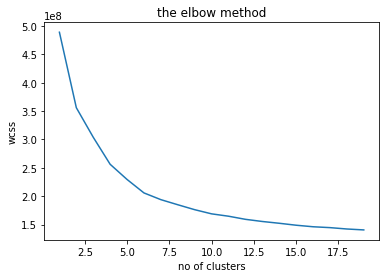

In [24]:
wcss_stemmed2 = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_stem2 = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_stem2.fit(X_stemmed2) #CHANGE
    wcss_stemmed2.append(kmeans_stem2.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_stemmed2[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [91]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 6
model_stem2 = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_stem2.fit(X_stemmed2) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_stem2 = model_stem2.cluster_centers_.argsort()[:, ::-1]
terms_stem2 = cv_stem2.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_stem2[i, :10]: #selects top terms
        print(' %s' % terms_stem2[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 the
 bank
 loan
 compani
 may
 busi
 financi
 includ
 capit
 requir
cluster 1:
 lender
 credit
 shall
 loan
 agent
 section
 rate
 agreement
 administr
 parti
cluster 2:
 new
 stylefontfamilytim
 0pt
 spanptdtd
 romantimesseriffontsize12ptlineheight119margin0ptspan
 stylefontsize10ptvisibilityhidden
 3pt
 000000margin0ptpadding0ptp
 ptdtd
 romantimesseriffontsize10ptlineheight119textalignrightmargin0pt
cluster 3:
 2016
 2015
 31
 decemb
 oper
 year
 revenu
 2014
 the
 end
cluster 4:
 the
 we
 product
 compani
 includ
 market
 our
 oper
 us
 may
cluster 5:
 product
 clinic
 may
 the
 drug
 fda
 approv
 patient
 trial
 we




In [105]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 15
model_stem2 = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_stem2.fit(X_stemmed2) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_stem2 = model_stem2.cluster_centers_.argsort()[:, ::-1]
terms_stem2 = cv_stem2.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_stem2[i, :10]: #selects top terms
        print(' %s' % terms_stem2[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 invest
 capit
 compani
 may
 incom
 us
 fee
 secur
 we
 the
cluster 1:
 new
 stylefontfamilytim
 0pt
 spanptdtd
 romantimesseriffontsize12ptlineheight119margin0ptspan
 stylefontsize10ptvisibilityhidden
 3pt
 000000margin0ptpadding0ptp
 ptdtd
 romantimesseriffontsize10ptlineheight119textalignrightmargin0pt
cluster 2:
 the
 may
 oper
 includ
 market
 requir
 us
 financi
 compani
 result
cluster 3:
 2016
 2015
 31
 oper
 decemb
 year
 revenu
 2014
 electr
 the
cluster 4:
 lender
 credit
 shall
 loan
 agent
 section
 rate
 agreement
 administr
 parti
cluster 5:
 the
 we
 product
 includ
 market
 servic
 provid
 oper
 us
 our
cluster 6:
 product
 the
 clinic
 may
 fda
 drug
 approv
 we
 develop
 patient
cluster 7:
 the
 we
 compani
 product
 includ
 market
 our
 oper
 busi
 custom
cluster 8:
 product
 drug
 clinic
 fda
 the
 may
 approv
 trial
 patient
 includ
cluster 9:
 loan
 bank
 the
 feder
 total
 31
 decemb
 secur
 commerci
 capit
cluster 10:
 produc

## Lemmatized

Initialization complete
Iteration 0, inertia 3117740329.0
Iteration 1, inertia 2986706605.0611973
Converged at iteration 1: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 3229844043.0
Iteration 1, inertia 2986706605.0611973
Converged at iteration 1: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 3291008939.0
Iteration 1, inertia 2986706605.0611973
Converged at iteration 1: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 3049057545.0
Iteration 1, inertia 2986706605.0611973
Converged at iteration 1: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 3071645067.0
Iteration 1, inertia 2986706605.0611973
Converged at iteration 1: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 4129936747.0
Iteration 1, inertia 2986706605.0611973
Co

Iteration 17, inertia 297705214.6860921
Iteration 18, inertia 296880195.7237852
Iteration 19, inertia 296021586.73149276
Iteration 20, inertia 295243652.43373185
Iteration 21, inertia 294616555.6438681
Iteration 22, inertia 294417112.51010793
Iteration 23, inertia 294230833.28189653
Converged at iteration 23: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 404741102.0
Iteration 1, inertia 305857999.91908896
Iteration 2, inertia 304843600.5579404
Iteration 3, inertia 304829758.4543317
Iteration 4, inertia 304792269.9625697
Iteration 5, inertia 304713646.49679005
Iteration 6, inertia 304537523.49241406
Iteration 7, inertia 304327329.3705552
Iteration 8, inertia 304061892.30808926
Iteration 9, inertia 303659256.947463
Iteration 10, inertia 303091441.8745636
Iteration 11, inertia 302634834.16155475
Iteration 12, inertia 302277978.44381875
Iteration 13, inertia 302061317.49965346
Iteration 14, inertia 301987931.45238614
Iteration 15, iner

Initialization complete
Iteration 0, inertia 376121197.0
Iteration 1, inertia 276762961.4157173
Iteration 2, inertia 274431755.91373575
Iteration 3, inertia 272934133.89008594
Iteration 4, inertia 271487823.1991756
Iteration 5, inertia 270717579.7443448
Iteration 6, inertia 270380725.3728533
Iteration 7, inertia 270277772.7205007
Iteration 8, inertia 270226282.5733036
Iteration 9, inertia 270204405.6280355
Iteration 10, inertia 270200671.66269886
Iteration 11, inertia 270199697.8529494
Iteration 12, inertia 270198706.0334509
Converged at iteration 12: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 387683623.0
Iteration 1, inertia 263804535.86021027
Iteration 2, inertia 259393089.96660197
Iteration 3, inertia 258415194.71955568
Iteration 4, inertia 257664341.17072624
Iteration 5, inertia 256788718.1653342
Iteration 6, inertia 255919504.33395588
Iteration 7, inertia 255144728.8887844
Iteration 8, inertia 254551148.1336407
Iteration 9,

Iteration 8, inertia 240124035.6714227
Iteration 9, inertia 239785627.89011917
Iteration 10, inertia 239761107.0618458
Iteration 11, inertia 239757925.81645304
Iteration 12, inertia 239755252.5582337
Iteration 13, inertia 239753067.5380623
Iteration 14, inertia 239752349.8976139
Converged at iteration 14: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 335309657.0
Iteration 1, inertia 236697236.380994
Iteration 2, inertia 227244456.93641517
Iteration 3, inertia 225388324.1939509
Iteration 4, inertia 224584092.97790644
Iteration 5, inertia 224164459.92883044
Iteration 6, inertia 223985882.53162643
Iteration 7, inertia 223891497.77107245
Iteration 8, inertia 223744353.92411616
Iteration 9, inertia 223675653.16538864
Iteration 10, inertia 223650070.24182793
Iteration 11, inertia 223641491.50095347
Iteration 12, inertia 223639472.62932128
Iteration 13, inertia 223636664.07195804
Iteration 14, inertia 223635027.67212445
Converged at itera

Iteration 5, inertia 221365422.03912073
Iteration 6, inertia 214926299.16080755
Iteration 7, inertia 207417595.6532309
Iteration 8, inertia 203793150.3510125
Iteration 9, inertia 201815989.32574832
Iteration 10, inertia 198510991.41229925
Iteration 11, inertia 195965856.87374225
Iteration 12, inertia 195576561.37679824
Iteration 13, inertia 195522675.2079652
Iteration 14, inertia 195474934.4986513
Iteration 15, inertia 195454153.45390153
Iteration 16, inertia 195449102.37406173
Iteration 17, inertia 195448752.95339426
Converged at iteration 17: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 303593507.0
Iteration 1, inertia 216520621.653832
Iteration 2, inertia 208899000.01112905
Iteration 3, inertia 200845429.2799028
Iteration 4, inertia 197594453.82167286
Iteration 5, inertia 196761689.10917306
Iteration 6, inertia 196616289.57965043
Iteration 7, inertia 196470644.92353478
Iteration 8, inertia 196246076.09858143
Iteration 9, inerti

Initialization complete
Iteration 0, inertia 300020136.0
Iteration 1, inertia 222062938.72807583
Iteration 2, inertia 216179524.53357247
Iteration 3, inertia 211949207.5336534
Iteration 4, inertia 210471403.87875703
Iteration 5, inertia 210092921.77340242
Iteration 6, inertia 209852208.911087
Iteration 7, inertia 209803774.24121124
Iteration 8, inertia 209760726.62289688
Iteration 9, inertia 209749737.1429885
Iteration 10, inertia 209749127.8072519
Converged at iteration 10: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 262110086.0
Iteration 1, inertia 192481785.7994741
Iteration 2, inertia 191320910.63803253
Iteration 3, inertia 191036029.90377852
Iteration 4, inertia 190915626.3136758
Iteration 5, inertia 190842391.6165326
Iteration 6, inertia 190759838.07821158
Iteration 7, inertia 190606656.64522588
Iteration 8, inertia 190002867.7896839
Iteration 9, inertia 189062432.37268394
Iteration 10, inertia 188632885.5441253
Iteration 1

Initialization complete
Iteration 0, inertia 258315696.0
Iteration 1, inertia 196186005.90835112
Iteration 2, inertia 190472034.30171254
Iteration 3, inertia 187330294.2799973
Iteration 4, inertia 186256121.80559024
Iteration 5, inertia 185947072.3794976
Iteration 6, inertia 185825410.0820266
Iteration 7, inertia 185793289.1559046
Iteration 8, inertia 185783272.8193504
Iteration 9, inertia 185780596.71274936
Iteration 10, inertia 185780329.38995123
Converged at iteration 10: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 255048047.0
Iteration 1, inertia 187897298.1998221
Iteration 2, inertia 184516098.81732658
Iteration 3, inertia 182638039.20428702
Iteration 4, inertia 182260048.16448987
Iteration 5, inertia 182120675.77870828
Iteration 6, inertia 182099514.48865786
Iteration 7, inertia 182078009.86639965
Iteration 8, inertia 182059187.02361983
Iteration 9, inertia 182047996.96591654
Iteration 10, inertia 182039174.5963691
Iteratio

Iteration 9, inertia 178228370.01474884
Iteration 10, inertia 178216055.07892564
Iteration 11, inertia 178210664.8122632
Iteration 12, inertia 178179091.56086126
Iteration 13, inertia 178101864.00781572
Iteration 14, inertia 178028818.90454844
Iteration 15, inertia 177962090.92927563
Iteration 16, inertia 177862249.78655264
Iteration 17, inertia 177634700.92422417
Iteration 18, inertia 177283956.05185038
Iteration 19, inertia 176547683.73477462
Iteration 20, inertia 176252565.09242672
Iteration 21, inertia 176207111.20256427
Iteration 22, inertia 176178895.2547495
Iteration 23, inertia 176162218.64840767
Iteration 24, inertia 176148363.88678497
Iteration 25, inertia 176145359.32725736
Converged at iteration 25: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 248741701.0
Iteration 1, inertia 180190647.43778008
Iteration 2, inertia 176683421.75171086
Iteration 3, inertia 174848233.95091262
Iteration 4, inertia 174458773.5678457
Iterati

Iteration 6, inertia 175805850.77060667
Iteration 7, inertia 174931922.7563831
Iteration 8, inertia 174739160.59716305
Iteration 9, inertia 174682948.24734965
Iteration 10, inertia 174662143.99286002
Iteration 11, inertia 174657551.29022557
Iteration 12, inertia 174654424.06637138
Iteration 13, inertia 174651285.9382338
Iteration 14, inertia 174647930.68715194
Converged at iteration 14: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 244455872.0
Iteration 1, inertia 186498743.15908042
Iteration 2, inertia 181640482.04855198
Iteration 3, inertia 177671278.6115405
Iteration 4, inertia 174539711.4690294
Iteration 5, inertia 173974146.05260575
Iteration 6, inertia 173859011.16304973
Iteration 7, inertia 173748002.2505007
Iteration 8, inertia 173611472.57472005
Iteration 9, inertia 173595977.52597138
Iteration 10, inertia 173587426.16570735
Iteration 11, inertia 173583447.99824077
Iteration 12, inertia 173579486.7089503
Iteration 13, iner

Iteration 32, inertia 170285258.30465102
Iteration 33, inertia 170279992.24711496
Iteration 34, inertia 170264420.23240098
Iteration 35, inertia 170245293.92397672
Iteration 36, inertia 170230473.5017403
Iteration 37, inertia 170207086.5088177
Iteration 38, inertia 170131902.8128034
Iteration 39, inertia 170025051.5544775
Iteration 40, inertia 169870499.75233608
Iteration 41, inertia 169601697.22830757
Iteration 42, inertia 169403356.5911897
Iteration 43, inertia 169114383.1645436
Iteration 44, inertia 169017232.66855675
Iteration 45, inertia 168998269.11512843
Iteration 46, inertia 168997261.11552897
Converged at iteration 46: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 233211172.0
Iteration 1, inertia 174479721.24485615
Iteration 2, inertia 172311178.97545433
Iteration 3, inertia 171504233.3928907
Iteration 4, inertia 171200247.47526544
Iteration 5, inertia 171089760.4462007
Iteration 6, inertia 170962077.35470784
Iteration 7, 

Initialization complete
Iteration 0, inertia 241586663.0
Iteration 1, inertia 178384124.86627117
Iteration 2, inertia 175042689.35483533
Iteration 3, inertia 173194355.77938247
Iteration 4, inertia 172651592.71233672
Iteration 5, inertia 172537294.03886276
Iteration 6, inertia 172500283.32342213
Iteration 7, inertia 172486749.53946942
Iteration 8, inertia 172434600.88176772
Iteration 9, inertia 172346637.89474267
Iteration 10, inertia 172317419.4961239
Iteration 11, inertia 172300144.90346265
Iteration 12, inertia 172288741.88868368
Iteration 13, inertia 172284096.29829457
Iteration 14, inertia 172279028.7734078
Iteration 15, inertia 172238364.15100825
Iteration 16, inertia 171572314.19948417
Iteration 17, inertia 169864076.77621934
Iteration 18, inertia 169632906.31855795
Iteration 19, inertia 169433343.4145391
Iteration 20, inertia 169242241.79091182
Iteration 21, inertia 169086143.97216913
Iteration 22, inertia 168953351.686867
Iteration 23, inertia 168892163.5517197
Iteration 24, i

Initialization complete
Iteration 0, inertia 230323667.0
Iteration 1, inertia 168037250.88946733
Iteration 2, inertia 164502295.37638307
Iteration 3, inertia 162503375.8169525
Iteration 4, inertia 161689957.09539366
Iteration 5, inertia 161453532.3007482
Iteration 6, inertia 161392435.72642243
Iteration 7, inertia 161376790.4315962
Iteration 8, inertia 161373244.13812467
Iteration 9, inertia 161372451.6623317
Iteration 10, inertia 161371844.28044373
Iteration 11, inertia 161371710.9731476
Converged at iteration 11: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 221741320.0
Iteration 1, inertia 164900284.61622268
Iteration 2, inertia 162888738.84182596
Iteration 3, inertia 162127480.6850027
Iteration 4, inertia 161835220.184903
Iteration 5, inertia 161721095.75790128
Iteration 6, inertia 161639797.4242797
Iteration 7, inertia 161617289.7236197
Iteration 8, inertia 161591389.1685045
Iteration 9, inertia 161569668.89411974
Iteration 10

Iteration 12, inertia 156499537.2191648
Iteration 13, inertia 156491389.30584705
Iteration 14, inertia 156485306.44950983
Iteration 15, inertia 156484211.53986692
Iteration 16, inertia 156483934.896223
Converged at iteration 16: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 218999307.0
Iteration 1, inertia 162067254.20221746
Iteration 2, inertia 160230391.06448403
Iteration 3, inertia 159161588.61346915
Iteration 4, inertia 158817242.0874134
Iteration 5, inertia 158689014.01671925
Iteration 6, inertia 158637544.5710069
Iteration 7, inertia 158586067.59790134
Iteration 8, inertia 158561487.58774614
Iteration 9, inertia 158540631.07337853
Iteration 10, inertia 158522885.23761246
Iteration 11, inertia 158497934.32264596
Iteration 12, inertia 158457173.96504858
Iteration 13, inertia 158409579.23597875
Iteration 14, inertia 158395538.16596773
Iteration 15, inertia 158391416.62979788
Iteration 16, inertia 158390748.8920347
Converged at i

Iteration 7, inertia 157077663.86668405
Iteration 8, inertia 157026141.78133193
Iteration 9, inertia 157004817.96283606
Iteration 10, inertia 156987508.67656633
Iteration 11, inertia 156966389.69585928
Iteration 12, inertia 156923776.51084864
Iteration 13, inertia 156871354.0588833
Iteration 14, inertia 156857730.0693585
Iteration 15, inertia 156851644.59228793
Iteration 16, inertia 156850983.39053112
Converged at iteration 16: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 216856448.0
Iteration 1, inertia 161785826.2289058
Iteration 2, inertia 159646642.21974984
Iteration 3, inertia 159105924.3202979
Iteration 4, inertia 158955082.19395217
Iteration 5, inertia 158854471.52180436
Iteration 6, inertia 158747882.9132538
Iteration 7, inertia 158607818.9753359
Iteration 8, inertia 158447486.1662513
Iteration 9, inertia 158390686.30277923
Iteration 10, inertia 158375962.58429623
Converged at iteration 10: center shift 0.0 within toleranc

Iteration 11, inertia 155898248.90542004
Iteration 12, inertia 155852961.2771363
Iteration 13, inertia 155806953.69480085
Iteration 14, inertia 155791999.1469004
Iteration 15, inertia 155785012.31600434
Converged at iteration 15: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 215282043.0
Iteration 1, inertia 161073324.8933426
Iteration 2, inertia 158010405.59791464
Iteration 3, inertia 156263883.32959035
Iteration 4, inertia 155278276.62785068
Iteration 5, inertia 154899950.1879129
Iteration 6, inertia 154565866.44328204
Iteration 7, inertia 154422114.00909525
Iteration 8, inertia 154212202.6623024
Iteration 9, inertia 154076924.17863426
Iteration 10, inertia 153951835.2812446
Iteration 11, inertia 153947583.23500296
Iteration 12, inertia 153946522.85641143
Iteration 13, inertia 153944685.2000946
Iteration 14, inertia 153944177.7979738
Iteration 15, inertia 153942458.7937253
Iteration 16, inertia 153941105.6112718
Iteration 17, iner

Iteration 6, inertia 152988902.64426774
Iteration 7, inertia 152969087.25648215
Iteration 8, inertia 152941349.59920207
Iteration 9, inertia 152919964.83195707
Iteration 10, inertia 152899321.01584327
Iteration 11, inertia 152870182.90542102
Iteration 12, inertia 152824895.27713722
Iteration 13, inertia 152778887.69480184
Iteration 14, inertia 152763933.1469013
Iteration 15, inertia 152756946.31600532
Converged at iteration 15: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 212689828.0
Iteration 1, inertia 159225898.3034487
Iteration 2, inertia 156000495.09310213
Iteration 3, inertia 154133592.85477737
Iteration 4, inertia 152879187.68268812
Iteration 5, inertia 152226519.202581
Iteration 6, inertia 151667767.02922165
Iteration 7, inertia 151286270.03904426
Iteration 8, inertia 150655337.33348614
Iteration 9, inertia 150266711.2310477
Iteration 10, inertia 150054726.23379022
Iteration 11, inertia 149938103.8012832
Iteration 12, iner

Iteration 16, inertia 143076171.05323562
Converged at iteration 16: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 216060931.0
Iteration 1, inertia 153516872.1200504
Iteration 2, inertia 151199193.96221846
Iteration 3, inertia 149971987.46760216
Iteration 4, inertia 149329026.29025856
Iteration 5, inertia 148919782.34815434
Iteration 6, inertia 148527004.55777234
Iteration 7, inertia 147881289.43524453
Iteration 8, inertia 147732975.77382794
Iteration 9, inertia 147685297.36501145
Iteration 10, inertia 147637656.40136772
Iteration 11, inertia 147608123.81308135
Iteration 12, inertia 147582615.74121
Iteration 13, inertia 147578281.0716356
Iteration 14, inertia 147575087.05553082
Iteration 15, inertia 147573719.75596076
Iteration 16, inertia 147573195.41057977
Converged at iteration 16: center shift 0.0 within tolerance 0.0014301990587615029
Initialization complete
Iteration 0, inertia 210007073.0
Iteration 1, inertia 154628158.852887

<function matplotlib.pyplot.show(*args, **kw)>

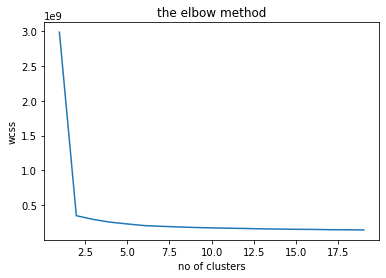

In [26]:
wcss_lemmad = [] #CHANGE
for i in range(1, 20): #max of 20 clusters otherwise might take too long
    kmeans_lem = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans_lem.fit(X_lemmad) #CHANGE
    wcss_lemmad.append(kmeans_lem.inertia_) #CHANGE
    
#Visualisation of inertia (how far away the points within a cluster are, want small inertia)
plt.plot(range(1,20),wcss_lemmad[0:20]) #CHANGE
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [27]:
#applying K-means based on above elbow method, can change true_k to the desired number of clusters
true_k = 10
model_lem = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model_lem.fit(X_lemmad) #CHANGE

#Print results
print("top terms for cluster:")
order_centroids_lem = model_lem.cluster_centers_.argsort()[:, ::-1]
terms_lem = cv_lem.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids_lem[i, :10]: #selects top terms
        print(' %s' % terms_lem[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 bank
 loan
 the
 company
 capital
 financial
 federal
 risk
 institution
 act
cluster 1:
 0pt
 style
 font
 margin
 times
 td
 size
 align
 bottom
 span
cluster 2:
 the
 we
 company
 product
 business
 our
 in
 service
 may
 market
cluster 3:
 product
 may
 clinical
 the
 drug
 fda
 patient
 trial
 patent
 in
cluster 4:
 company
 the
 million
 2018
 december
 31
 2017
 year
 interest
 rate
cluster 5:
 product
 the
 clinical
 may
 fda
 drug
 we
 patient
 in
 trial
cluster 6:
 2016
 2015
 31
 december
 year
 2014
 generation
 expense
 revenue
 the
cluster 7:
 credit
 lender
 shall
 agent
 loan
 section
 agreement
 rate
 party
 administrative
cluster 8:
 business
 the
 may
 company
 investment
 combination
 we
 share
 in
 initial
cluster 9:
 the
 million
 may
 financial
 company
 net
 31
 december
 business
 income




## Looking at the clustering (using stemmed and removed punctuation)

In [92]:
clusters_stem2 = model_stem2.labels_.tolist()

In [93]:
companies = {'tickers':company_ids, 'descriptions':company_descriptions, 'clusters_stem2': clusters_stem2}
frame = pd.DataFrame(companies, index = [clusters_stem2])
frame.head(10)

,tickers,descriptions,clusters_stem2
0,MFIN:1000209\n,"We, Medallion Financial Corp. or the Company, ...",0
4,HSIC:1000228\n,"General Henry Schein, Inc. is a solutions comp...",4
4,CLB:1000229\n,General Core Laboratories N.V. is a Netherland...,4
4,OCC:1000230\n,Overview Optical Cable Corporation was incorpo...,4
4,KTYB:1000232\n,"General Kentucky Bancshares, Inc. (“Company,” ...",4
4,IMH:1000298\n,"Impac Mortgage Holdings, Inc., sometimes refer...",4
0,SWM:1000623\n,1 Item 1A. Risk Factors 14 Item 1B. Unresolved...,0
4,NVAX:1000694\n,"Overview Novavax, Inc., together with our whol...",4
4,WAT:1000697\n,"General Waters Corporation (the “Company,” “we...",4
0,DISH:1001082\n,1 Item 1A. Risk Factors 24 Item 1B. Unresolved...,0


In [94]:
frame['clusters_stem2'].value_counts()

4    1409
0     341
5     245
3      10
1       3
2       1
Name: clusters_stem2, dtype: int64

In [102]:
frame.loc[frame['clusters_stem2'] == 5]

,tickers,descriptions,clusters_stem2
5,TGTX:1001316\n,OVERVIEW We are a biopharmaceutical company de...,5
5,PLX:1006281\n,We are a biopharmaceutical company focused on ...,5
5,ATRS:1016169\n,"Company Overview Antares Pharma, Inc. (“Antare...",5
5,SEEL:1017491\n,We are a clinical-stage biopharmaceutical comp...,5
5,SNBP:1029125\n,"As used in this report, unless specifically in...",5
...,...,...,...
5,ABIO:907654\n,"Some of the statements under “Business,” “Risk...",5
5,TTNP:910267\n,Overview We are a pharmaceutical company devel...,5
5,ARMP:921114\n,Overview We are a clinical-stage biotechnology...,5
5,FGEN:921299\n,OVERVIEW We are a leading biopharmaceutical co...,5


## Testing Hierarchical Clustering

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [50]:
dist = 1 - cosine_similarity(X_stemmed2)

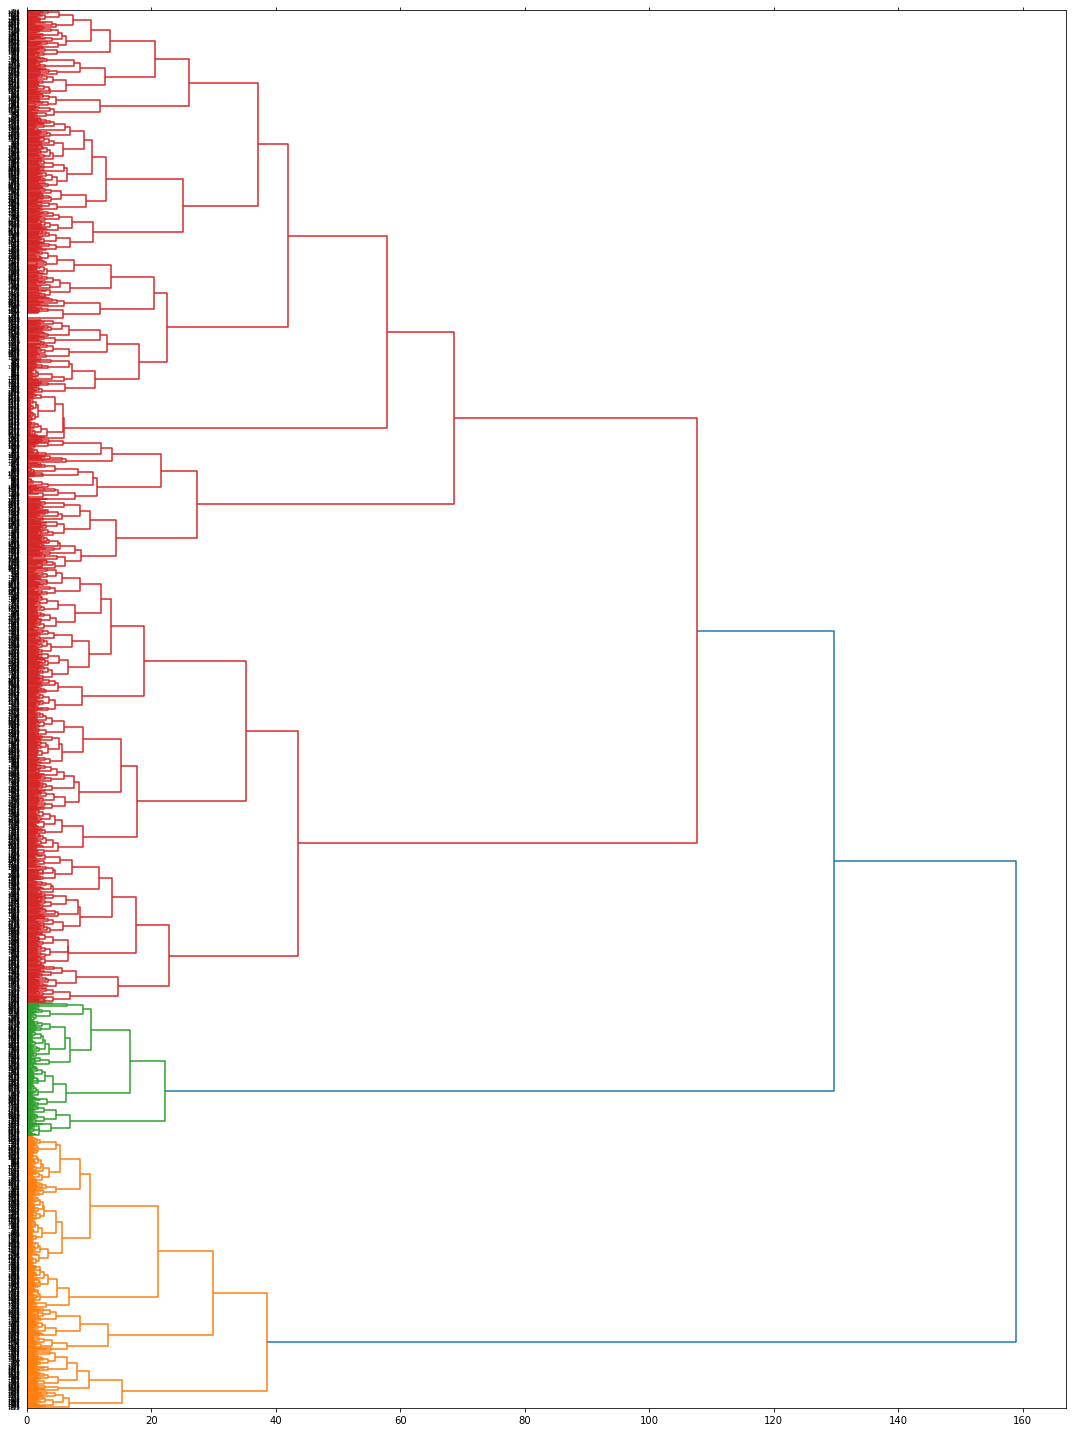

In [104]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");  #, labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

# LDA 

In [28]:
n_features = 1000
n_components = 10
n_top_words = 20

In [29]:
tf_vec_raw = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_raw = tf_vec_raw.fit_transform(company_descriptions)

tf_vec_stem = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_stem = tf_vec_stem.fit_transform(stemmed_text)

tf_vec_stem2 = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_stem2 = tf_vec_stem2.fit_transform(stemmed_text2)

tf_vec_lem = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf_lem = tf_vec_lem.fit_transform(lemmad_text)

In [32]:
print(tf_raw.shape)
print(tf_stem.shape)
print(tf_stem2.shape)
print(tf_lem.shape)

(2009, 1000)
(2009, 1000)
(2009, 1000)
(2009, 1000)


## Raw

In [34]:
lda_raw = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_raw.fit(tf_raw)
lda_raw.perplexity(tf_raw)

497.63063277295566

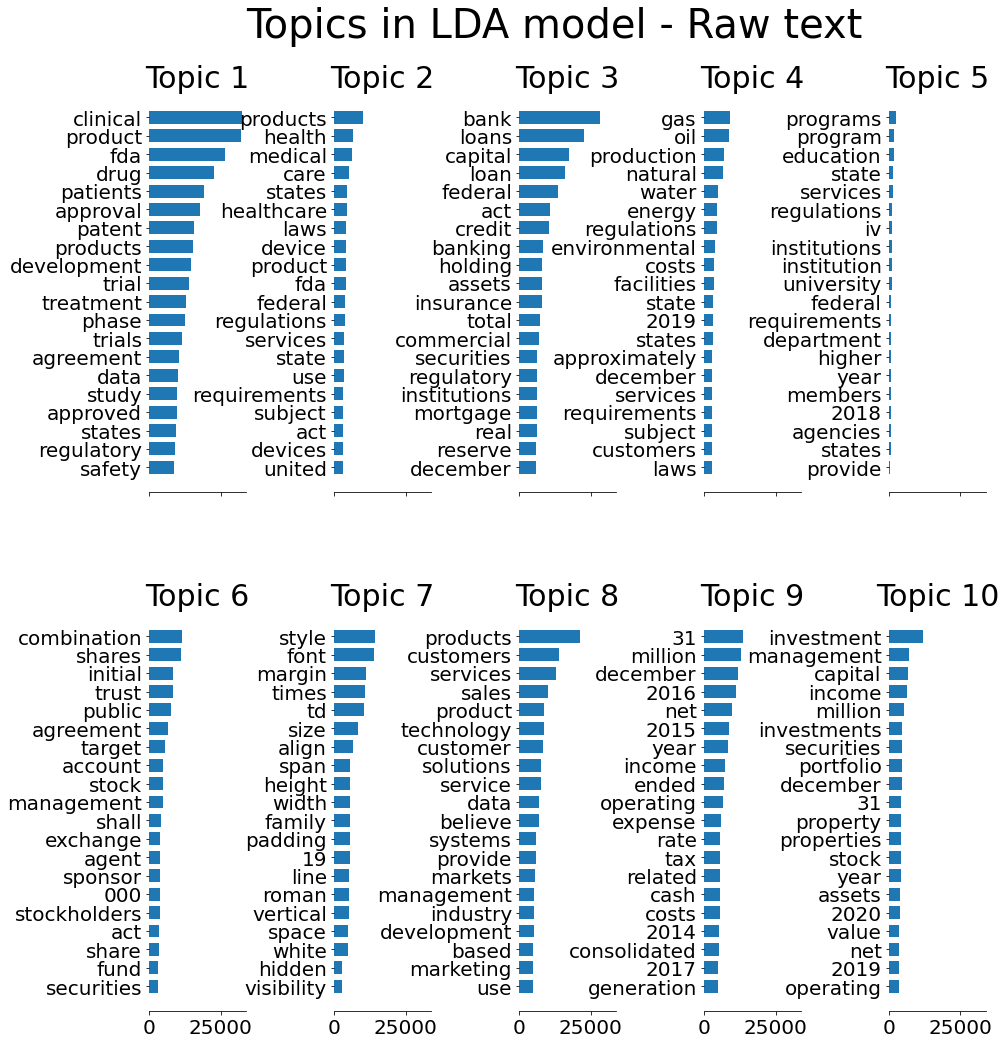

In [44]:
# names of words 
tf_feature_names_raw = tf_vec_raw.get_feature_names()
plot_top_words(lda_raw, tf_feature_names_raw, n_top_words, 'Topics in LDA model - Raw text')

## Stemmed

In [38]:
lda_stem = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_stem.fit(tf_stem)
lda_stem.perplexity(tf_stem)

485.9123998306714

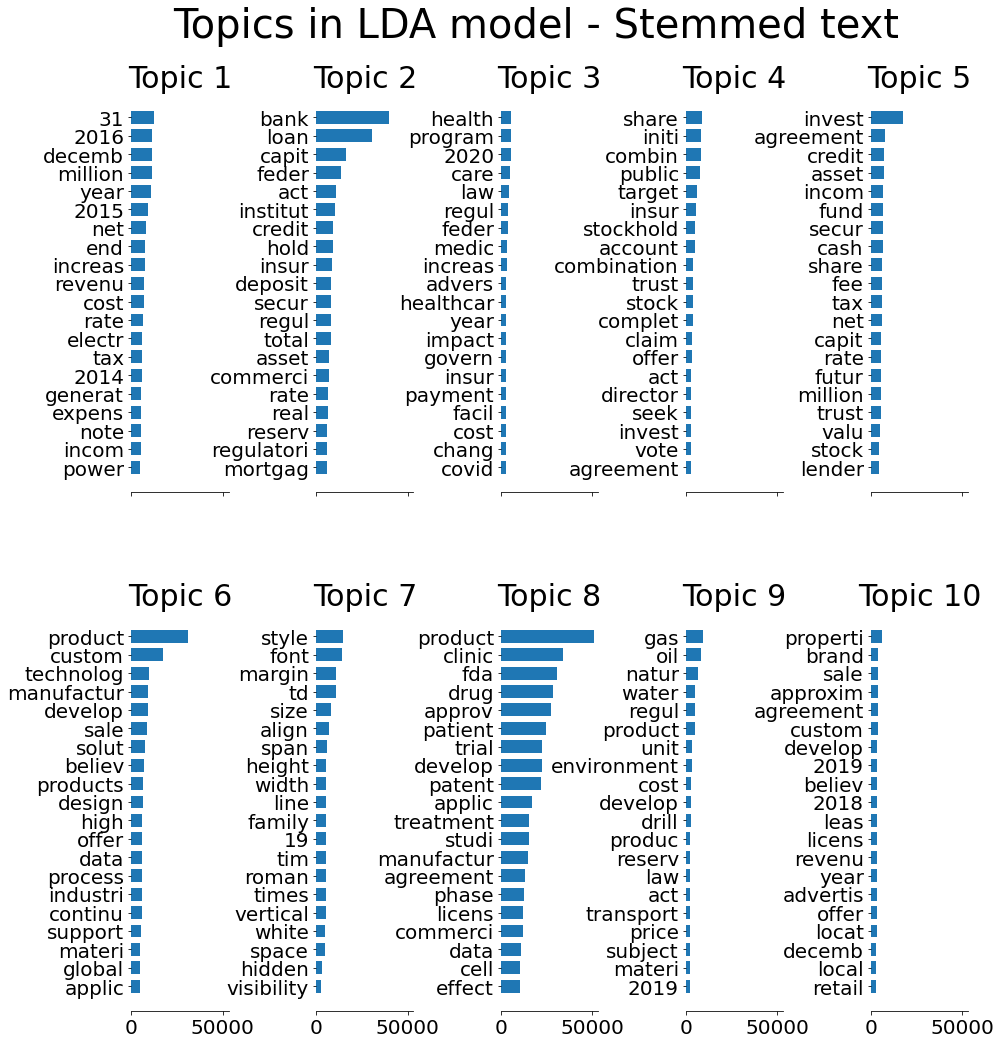

In [45]:
# names of words 
tf_feature_names_stem = tf_vec_stem.get_feature_names()
plot_top_words(lda_stem, tf_feature_names_stem, n_top_words, 'Topics in LDA model - Stemmed text')

## Stemmed and removed punctuation

In [40]:
lda_stem2 = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_stem2.fit(tf_stem2)
lda_stem2.perplexity(tf_stem2)

515.8936324140411

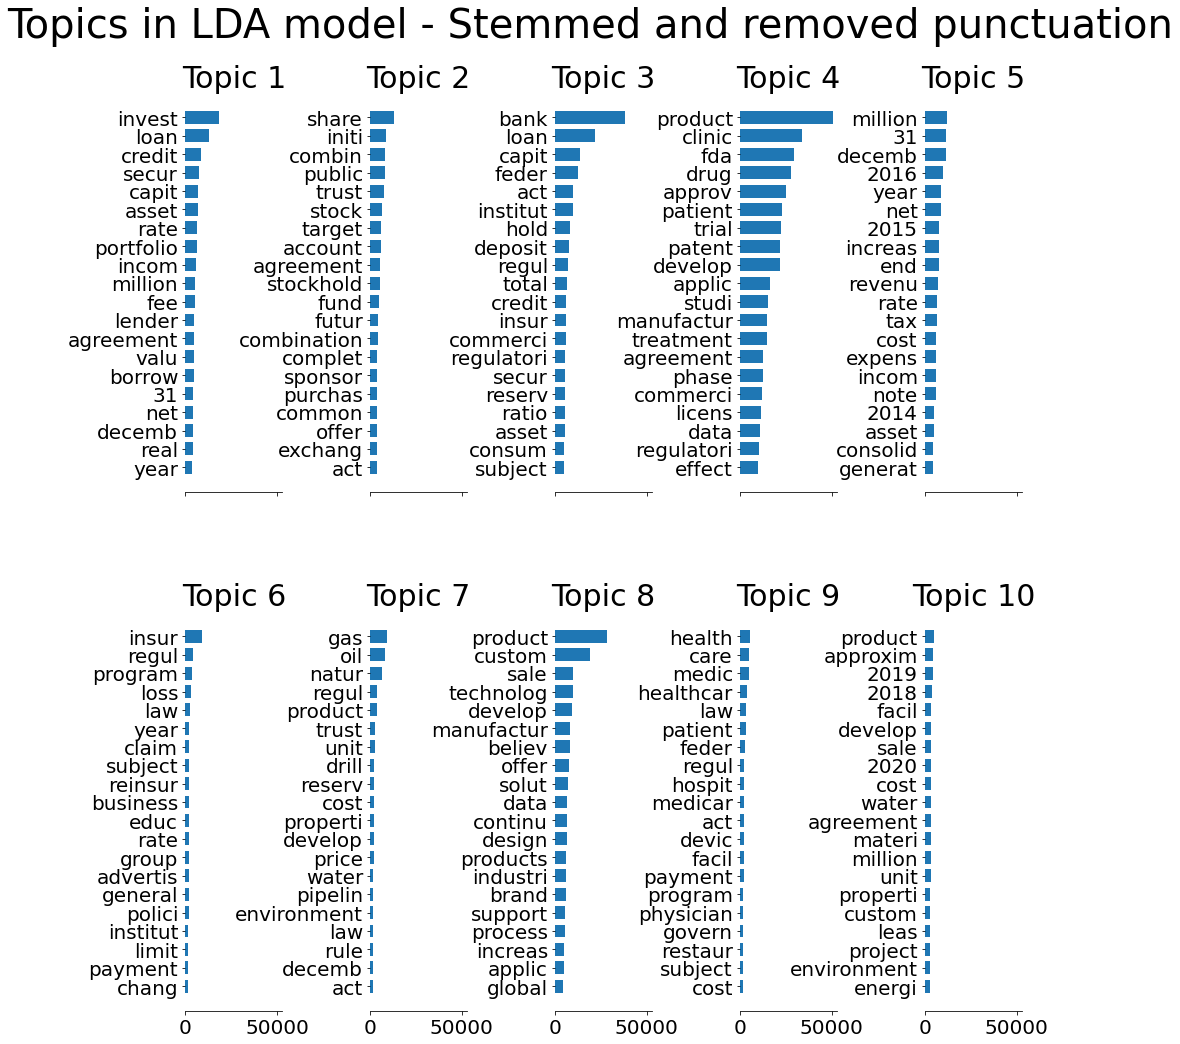

In [46]:
# names of words 
tf_feature_names_stem2 = tf_vec_stem2.get_feature_names()
plot_top_words(lda_stem2, tf_feature_names_stem2, n_top_words, 'Topics in LDA model - Stemmed and removed punctuation')

## Lemmatised

In [42]:
lda_lem = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_lem.fit(tf_lem)
lda_lem.perplexity(tf_lem)

488.2998418572545

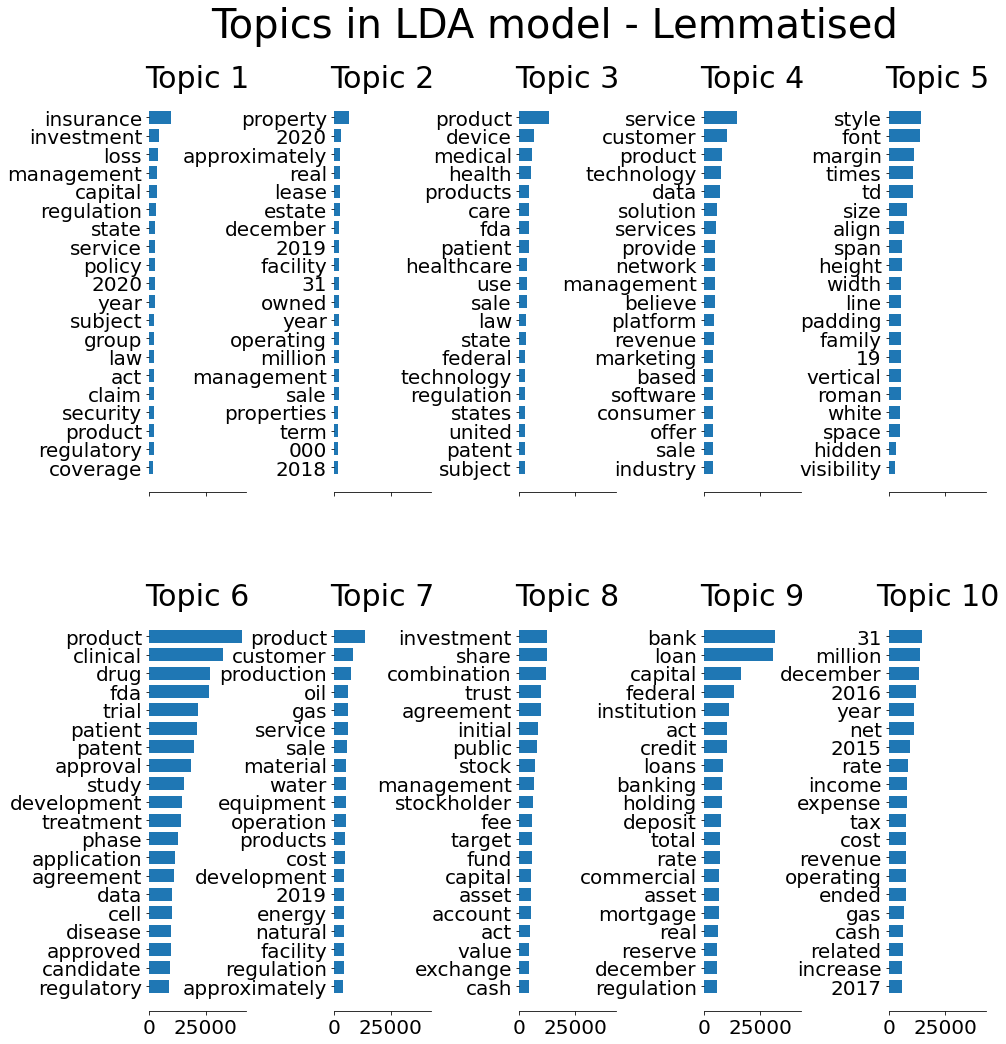

In [47]:
# names of words 
tf_feature_names_lem = tf_vec_lem.get_feature_names()
plot_top_words(lda_lem, tf_feature_names_lem, n_top_words, 'Topics in LDA model - Lemmatised')